## Subnetwork FLOPs

| Subnet      | FLOPs | Params     |
| :---        |    :----:   |          ---: |
| largest      | 3405398016.0       | 73755048.0   |
| Middle2   |    1645363200.0     |  36428808.0     |
| Middle1   |    961167360.0     |  26688568.0     |
| Smallest   |   460996608.0    |    12425256.0   |



| Subnet      | GFLOPs 
| :---        |    :----:   | 
| largest      | 3.41       | 
| Middle2   |    1.65     | 
| Middle1   |    0.96     |  
| Smallest   |   0.46    | 

### FedNAS darts subnetworks

| Subnet      | FLOPs | Params     |
| :---        |    :----:   |          ---: |
| largest      | 670990336.0       | 39418.0   |
| middle   |    8522432512.0     |  513994.0     |
| smallest   |    191746015232.0     |  17940106.0     |


In [312]:
import csv
import matplotlib
import seaborn as sns
sns.set_style("whitegrid")
matplotlib.style.use("seaborn-whitegrid")
matplotlib.rcParams['font.family'] = "Times New Roman"

def_font_size = 20

#matplotlib.rcParams['font.size'] = def_font_size=16
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["lines.linewidth"] = 4
matplotlib.rcParams["lines.markersize"] = 12
matplotlib.rcParams["xtick.labelsize"] = 24
matplotlib.rcParams["ytick.labelsize"] = 24



matplotlib.rc("axes", **{"labelsize": 28, "titlesize": "large"})
matplotlib.rc("legend", **{"fontsize": "medium"})
matplotlib.rcParams["figure.figsize"] = (8, 5)

/tmp/ipykernel_2235306/504898940.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-whitegrid")


In [313]:
from weight_shared_analyzer import WeightSharedRun, plot_pareto_curves_ws, get_pareto_curves_df
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [314]:
smallest_subnet = {"d":[0,0,0,0], "e": 0.1}
middle_1_subnet = {"d":[0,1,0,1], "e": 0.14}
middle_2_subnet = {"d":[1,1,1,1], "e": 0.18}
largest_subnet = {"d":[2,2,2,2], "e": 0.25}
pareto_front_repr = [smallest_subnet, middle_1_subnet, middle_2_subnet, largest_subnet]
pareto_mapping = {f"{smallest_subnet}": 0.46,  f"{middle_1_subnet}": 0.96, f"{middle_2_subnet}": 1.65, f"{largest_subnet}" : 3.41}
subnet_ordering = [0.46, 0.96, 1.65, 3.41]
smallest_subnet_darts = {'d': []}
middle_subnet_darts = {'d': []}
largest_subnet_darts = {'d': []}
pareto_front_repr_darts = [smallest_subnet_darts, middle_subnet_darts, largest_subnet_darts]
pareto_mapping_darts = {f"{smallest_subnet_darts}": 0.67,  f"{middle_subnet_darts}": 1.82, f"{largest_subnet_darts}": 3.66}
pareto_mapping_darts_2 = {f"{smallest_subnet_darts}": 0.47,  f"{middle_subnet_darts}": 1.81, f"{largest_subnet_darts}": 3.18}

subnet_ordering_darts = [0.67, 1.82, 3.66]
subnet_ordering_darts_2 = [0.47, 1.81, 3.18]


In [315]:
def max_per_seed(seeds, uptil_r, mode="avg", fedavg=True, fednas=False, dart_map=pareto_mapping_darts):
    best_accs = []
    for s in seeds:
        cur_s = None
        if not fednas:
            cur_s = WeightSharedRun(s, pareto_front_repr, pareto_mapping)
        else:
            cur_s = WeightSharedRun(s, pareto_front_repr_darts, dart_map)
        if fedavg:
            cur_best_acc, _ = get_pareto_curves_df([cur_s], "Test/{model}/Acc", uptil_round=uptil_r, axis=0)
            best_accs.append(cur_best_acc[0])
            #print("curbestacc: ", cur_best_acc, type(cur_best_acc), cur_best_acc[0])
        else:
            cur_best_acc, _ = get_pareto_curves_df([cur_s], "Test/{model}/Acc", uptil_round=uptil_r, rename=True, mode=mode)
            cur_list = []
            for order in subnet_ordering:
                cur_list.append(cur_best_acc.at[order, cur_best_acc.columns[0]])
                #print("curbestacc: ", order, cur_best_acc.at[order, cur_best_acc.columns[0]], type(cur_best_acc.at[order, cur_best_acc.columns[0]]))
            best_accs.append(cur_list)
    return best_accs
test = max_per_seed(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"], 1500)
print(test)
print("avg: ", np.mean(test))
print("std: ", np.std(test))
test_2 = max_per_seed(["flofa/cifar10-cleaned/1kdvgelh", "flofa/cifar10-cleaned/2fukkiem", "flofa/cifar10-cleaned/15mal9ri"], 1500, fednas=True)
print(test_2)
print("avg: ", np.mean(test_2))
print("std: ", np.std(test_2))

/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])


[0.8515625, 0.858573717948718, 0.8473557692307693]
avg:  0.8524973290598291
std:  0.004627167772187596


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])


[0.7425, 0.7447, 0.7409]
avg:  0.7427
std:  0.001557776192739732


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])


In [316]:
print("WEIGHT SHARED TEST")
test = max_per_seed(["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], 1500, fedavg=False)
print(test)
print("avg: ", np.mean(test, axis=0))
print("std: ", np.std(test, axis=0))

WEIGHT SHARED TEST
[[0.895332532051282, 0.9053485576923077, 0.9124599358974359, 0.917167467948718], [0.89453125, 0.9033453525641025, 0.9074519230769231, 0.9130608974358975], [0.8927283653846154, 0.8979366987179487, 0.9079527243589743, 0.9099559294871795]]
avg:  [0.89419738 0.9022102  0.90928819 0.91339476]
std:  [0.00108904 0.00313053 0.00225206 0.00295355]


In [317]:
def fedavgCurves_dep(smallest, middle1, middle2, largest):
    fedavg_smallest = WeightSharedRun(smallest, pareto_front_repr, pareto_mapping)
    fedavg_middle_1 = WeightSharedRun(middle1, pareto_front_repr, pareto_mapping)
    fedavg_middle_2 = WeightSharedRun(middle2, pareto_front_repr, pareto_mapping)
    fedavg_largest = WeightSharedRun(largest, pareto_front_repr, pareto_mapping)

    print(fedavg_smallest.name)
    print(fedavg_smallest.df["round"].max())

    print(fedavg_middle_1.name)
    print(fedavg_middle_1.df["round"].max())

    print(fedavg_middle_2.name)
    print(fedavg_middle_2.df["round"].max())

    print(fedavg_largest.name)
    print(fedavg_largest.df["round"].max())
    return [fedavg_smallest, fedavg_middle_1, fedavg_middle_2, fedavg_largest]

def fedavgCurves(smallest, middle1, middle2, largest, uptil_r=1500):
    smallest = max_per_seed(smallest, uptil_r)
    middle1 = max_per_seed(middle1, uptil_r)
    middle2 = max_per_seed(middle2, uptil_r)
    largest = max_per_seed(largest, uptil_r)
    return [smallest, middle1, middle2, largest]

def fednasCurves_dep(smallest, middle, largest, mapping=pareto_mapping_darts):
    fednas_smallest = WeightSharedRun(smallest, pareto_front_repr_darts, mapping)
    fednas_middle = WeightSharedRun(middle, pareto_front_repr_darts, mapping)
    fednas_largest = WeightSharedRun(largest, pareto_front_repr_darts, mapping)

    print(fednas_smallest.name)
    print(fednas_smallest.df["round"].max())

    print(fednas_middle.name)
    print(fednas_middle.df["round"].max())

    print(fednas_largest.name)
    print(fednas_largest.df["round"].max())
    return [fednas_smallest, fednas_middle, fednas_largest]

def fednasCurves(smallest, middle, largest, uptil_r=1500):
    smallest = max_per_seed(smallest, uptil_r, fednas=True)
    middle = max_per_seed(middle, uptil_r, fednas=True)
    largest = max_per_seed(largest, uptil_r, fednas=True)
    return [smallest, middle, largest]

In [318]:
def fed_paretos_internal(fedavg_runs, name="iFedAvg", subnet_ordering_internal=subnet_ordering):
    avg_acc = []
    std_acc = []
    for run in fedavg_runs:
        avg_acc.append(np.mean(run))
        std_acc.append(np.std(run))
    fed_pareto = pd.Series(data=avg_acc, index=subnet_ordering_internal, name=name)
    error_fed_pareto = pd.Series(data=std_acc, index=subnet_ordering_internal, name=name)
    return fed_pareto, error_fed_pareto

def ws_paretos_internal(seeds, rnum, name="SuperFed", mode="avg"):
    print(f"{name} pareto generation running...")
    ws = max_per_seed(seeds, rnum, mode=mode, fedavg=False)
    avg_acc = np.mean(ws, axis=0)
    std_acc = np.std(ws, axis=0)
    ws_pareto = pd.Series(data=avg_acc, index=subnet_ordering, name=name)
    error_ws_pareto = pd.Series(data=std_acc, index=subnet_ordering, name=name)
    return ws_pareto, error_ws_pareto

def fed_paretos(smallest, middle1, middle2, largest, uptil_r=1500, name="iFedAvg"):
    print("fed pareto generation running...")
    return fed_paretos_internal(fedavgCurves(smallest, middle1, middle2, largest, uptil_r), name)

def fednas_paretos(smallest, middle, largest, uptil_r=1500, name="iFedNAS", subnet_ordering_internal=subnet_ordering_darts):
    print("fednas pareto generation running...")
    return fed_paretos_internal(fednasCurves(smallest, middle, largest, uptil_r), name, subnet_ordering_internal=subnet_ordering_darts)

def ws_paretos(ws_runs, rnum, names, mode="avg", modify_names=None):
    ws_concat_list = []
    error_ws_concat_list = []
    for ws_run, name in zip(ws_runs, names):
        cur_pareto, cur_error_pareto = ws_paretos_internal(ws_run, rnum, name=name, mode=mode)
        if modify_names is not None and name in modify_names.keys():
            with open(modify_names[name], newline='') as csvfile:
                csvReader = csv.reader(csvfile, delimiter=' ')
                for row in csvReader:
                    cur_pareto[float(row[0])] = float(row[1])
                    cur_error_pareto[float(row[0])] = float(row[2])
            cur_pareto.sort_index(inplace=True)
            cur_error_pareto.sort_index(inplace=True)
        ws_concat_list.append(cur_pareto)
        error_ws_concat_list.append(cur_error_pareto)
    return pd.concat(ws_concat_list, axis=1), pd.concat(error_ws_concat_list, axis=1)

In [319]:
markersize_def = 8
def adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, ylim_1, ylim_2, 
             rnum, save_name, xlim_1=0.3, xlim_2=3.5, mode="avg", exclude_fedavg=False, colors=None,
            leg_font_size=def_font_size, ncol=1, leg_ordering=None, markers=None, fednas_pareto=None, error_fednas_pareto=None):
    #matplotlib.style.use("seaborn-whitegrid")
    fednas = True if fednas_pareto is not None and error_fednas_pareto is not None else False
    if not exclude_fedavg:
        if fednas:
            final_df = pd.concat([fed_pareto, fednas_pareto, ws_pareto], axis=1)
            final_error_df = pd.concat([error_fed_pareto, error_fednas_pareto, error_ws_pareto], axis=1)
        else:
            final_df = pd.concat([fed_pareto, ws_pareto], axis=1)
            final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1)
    else:
        final_df = pd.concat([ws_pareto], axis=1)
        final_error_df = pd.concat([error_ws_pareto], axis=1)
    print(final_df)
    if colors is not None:
        ax = None
        for i, (col, ax_fill, color) in enumerate(zip(final_df.columns, ax_fill_list, colors)):
            cur_col = final_df.loc[:, [col]]
            cur_col.dropna(inplace=True)
            ax = cur_col.plot.line(marker='o' if markers is None else markers[i], color=color, ax=ax, markersize=markersize_def)
            cur_error_col = final_error_df.loc[:, [col]]
            cur_error_col.dropna(inplace=True)
            ax.fill_between(cur_col.index, cur_col[ax_fill[0]] - cur_error_col[ax_fill[0]], cur_col[ax_fill[0]] + cur_error_col[ax_fill[0]], alpha=ax_fill[1], color=color)
    else:
        ax = None
        for i, (col, ax_fill) in enumerate(zip(final_df.columns, ax_fill_list)):
            cur_col = final_df.loc[:, [col]]
            cur_col.dropna(inplace=True)
            ax = cur_col.plot.line(marker='o' if markers is None else markers[i], ax=ax, markersize=markersize_def)
            cur_error_col = final_error_df.loc[:, [col]]
            cur_error_col.dropna(inplace=True)
            ax.fill_between(cur_col.index, cur_col[ax_fill[0]] - cur_error_col[ax_fill[0]], cur_col[ax_fill[0]] + cur_error_col[ax_fill[0]], alpha=ax_fill[1])
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    if fednas:
        plt.xscale("log")
    plt.xlabel("GMACS")
    plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
    plt.ylim(ylim_1,ylim_2) # have uniform y-axis accross all plots
    plt.ylabel("Test Accuracy")
    plt.tight_layout()
    if leg_ordering is not None:
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend([handles[idx] for idx in leg_ordering],[labels[idx] for idx in leg_ordering], loc=4, ncol=ncol, prop={'size':leg_font_size})
    else:
        plt.legend(loc=4, ncol=ncol, prop={'size':leg_font_size})
    plt.savefig(save_name)
    #return final_df, final_error_df

In [320]:
fedavg_runs = fedavgCurves_dep(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                          ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                           ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                           ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"],
                          )

alph=100-fedavg-smallest-subnet
1650.0
alph=100-fedavg-small-subnet
1750.0
alph=100-fedavg-middle-subnet
1499.3333333333333
alph=100-fedavg-largest-subnet
1499.0


In [321]:
maxnet = WeightSharedRun(["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], pareto_front_repr, pareto_mapping, name="SuperFed")
print(maxnet.name)
print(maxnet.df["round"].max())

SuperFed
1650.0


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

0.46    0.851429
0.96    0.861912
1.65    0.874399
3.41    0.893830
Name: iFedAvg, dtype: float64
0.46    0.006208
0.96    0.004069
1.65    0.003115
3.41    0.008616
Name: iFedAvg, dtype: float64
      SuperFed
0.96  0.901810
1.65  0.909422
3.41  0.913094
0.46  0.893530
      SuperFed
0.96  0.003717
1.65  0.002632
3.41  0.003696
0.46  0.001565
here        iFedAvg  SuperFed
0.46  0.851429  0.893530
0.96  0.861912  0.901810
1.65  0.874399  0.909422
3.41  0.893830  0.913094
0.46    0.851429
0.96    0.861912
1.65    0.874399
3.41    0.893830
Name: iFedAvg, dtype: float64
     iFedNAS
8.6    0.845
       iFedAvg  SuperFed  iFedNAS
0.46  0.851429  0.893530      NaN
0.96  0.861912  0.901810      NaN
1.65  0.874399  0.909422      NaN
3.41  0.893830  0.913094      NaN
8.60       NaN       NaN    0.845


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

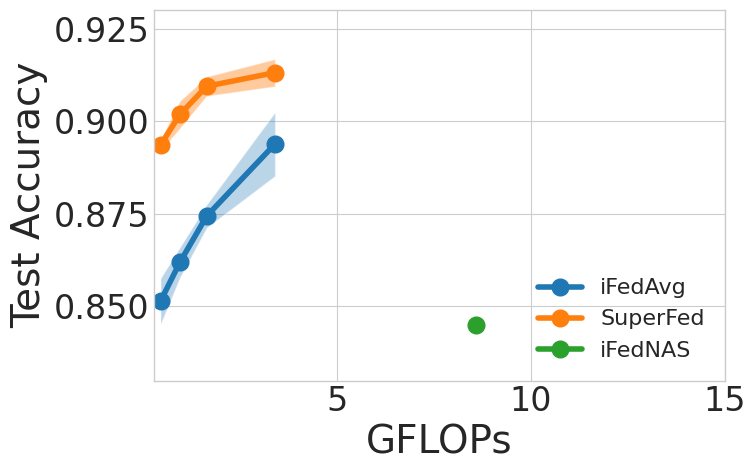

In [322]:
#matplotlib.style.use("seaborn-whitegrid")
ws_runs = [maxnet]

mode="avg"
rounds = [1500]
for rnum in rounds:
    fed_pareto, error_fed_pareto = get_pareto_curves_df(fedavg_runs, "Test/{model}/Acc", uptil_round=rnum, rename=True, axis=0, name="iFedAvg")
    print(fed_pareto)
    print(error_fed_pareto)
    ws_pareto, error_ws_pareto = get_pareto_curves_df(ws_runs,  "Test/{model}/Acc", uptil_round=rnum, rename=True, mode=mode)
    print(ws_pareto)
    print(error_ws_pareto)
    final_df = pd.concat([fed_pareto, ws_pareto], axis=1).loc[subnet_ordering]
    print("here", final_df)
    print(fed_pareto)
    fednas = pd.DataFrame([0.845], columns=['iFedNAS'], index=[8.6])
    print(fednas)
    final_df = pd.concat([final_df, fednas], axis=1)
    print(final_df)
    final_error_df = pd.concat([error_fed_pareto, error_ws_pareto], axis=1).loc[subnet_ordering]
#     ax = final_df.plot.line(yerr=final_error_df, marker='o')
    ax = final_df.plot.line(marker='o')
#     print(final_df.index)
#     print(final_df["SuperFed"] - final_error_df["SuperFed"])
    ax.fill_between(final_df.index, final_df["iFedAvg"] - final_error_df["iFedAvg"], final_df["iFedAvg"] + final_error_df["iFedAvg"], alpha=0.3)
    ax.fill_between(final_df.index, final_df["SuperFed"] - final_error_df["SuperFed"], final_df["SuperFed"] + final_error_df["SuperFed"], alpha=0.4)
    #plt.plot()
    plt.xlabel("GFLOPs")
    plt.xlim(0.3,15) # have uniform x-axis accross all plots
    plt.ylim(0.83,0.93) # have uniform y-axis accross all plots
    plt.ylabel("Test Accuracy")
    plt.tight_layout()
    plt.legend(loc=4)
    plt.savefig("cifar10_alph100.pdf")

# UPDATED GRAPHS

In [323]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                                           ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                                           ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                                           ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"],
                                           uptil_r=1500)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cifar10-cleaned/22d50v0j", "flofa/cifar10-cleaned/c3ff3tp4", "flofa/cifar10-cleaned/fvmstqyo"],
                                           ["flofa/cifar10-cleaned/1t7mvsrw", "flofa/cifar10-cleaned/3u0sz8o3", "flofa/cifar10-cleaned/34nz038u"],
                                           ["flofa/cifar10-cleaned/2978fqgg", "flofa/cifar10-cleaned/unfjfu1p", "flofa/cifar10-cleaned/39pzk946"],
                                           uptil_r=1500)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"]], 1500, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.852497       NaN          0.894197
0.960000  0.863649       NaN          0.902210
1.650000  0.875868       NaN          0.909288
3.410000  0.894431       NaN          0.913395
0.670000       NaN  0.773333               NaN
1.820000       NaN  0.864100               NaN
3.660000       NaN  0.894300               NaN
0.789271       NaN       NaN          0.897403
1.129009       NaN       NaN          0.904581
2.200130       NaN       NaN          0.910023
2.464371       NaN       NaN          0.910524
2.728612       NaN       NaN          0.910958
3.403370       NaN       NaN          0.913395


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

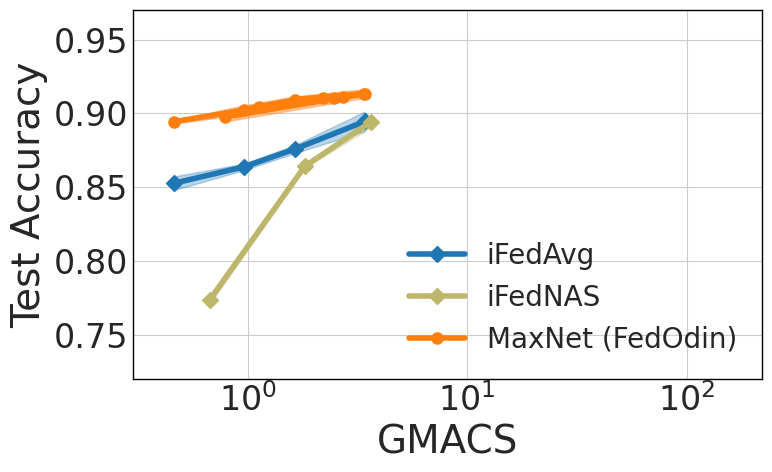

In [324]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.72, 0.97, 1500, "cifar10.pdf", markers=['D', 'D', 'o'], fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [325]:

print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.773333
1.82    0.864100
3.66    0.894300
Name: iFedNAS, dtype: float64 
 0.67    0.003065
1.82    0.001042
3.66    0.003634
Name: iFedNAS, dtype: float64


In [326]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.852497
0.96    0.863649
1.65    0.875868
3.41    0.894431
Name: iFedAvg, dtype: float64 
 0.46    0.004627
0.96    0.002225
1.65    0.002713
3.41    0.006707
Name: iFedAvg, dtype: float64


In [327]:
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], 
                                         ["flofa/cifar10-cleaned/1wf8vnmm", "flofa/cifar10-cleaned/2eaneuol", "flofa/cifar10-cleaned/1urn02s2"], 
                                         ["flofa/cifar10-cleaned/3ppweo3m", "flofa/cifar10-cleaned/2e384bkl", "flofa/cifar10-cleaned/1xwbymwh"],
                                         ["flofa/cifar10-cleaned/wvbq5byq", "flofa/cifar10-cleaned/2odkw0kg", "flofa/cifar10-cleaned/mpmp3lxm"]], 1500, ["MaxNet (FedOdin)", "PS (wo teacher)", "PS (w teacher)", "Random"], modify_names=name_modifier)


MaxNet (FedOdin) pareto generation running...
PS (wo teacher) pareto generation running...
PS (w teacher) pareto generation running...
Random pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)  \
0.460000  0.852497          0.894197         0.838833        0.865567   
0.960000  0.863649          0.902210         0.854600        0.888800   
1.650000  0.875868          0.909288         0.860567        0.900067   
3.410000  0.894431          0.913395         0.864400        0.903200   
0.789271       NaN          0.897403              NaN             NaN   
1.129009       NaN          0.904581              NaN             NaN   
2.200130       NaN          0.910023              NaN             NaN   
2.464371       NaN          0.910524              NaN             NaN   
2.728612       NaN          0.910958              NaN             NaN   
3.403370       NaN          0.913395              NaN             NaN   

            Random  
0.460000  0.845954  
0.960000  0.861245  
1.650000  0.869792  
3.410000  0.871428  
0.789271       NaN  
1.129009       NaN  
2.200130       NaN  
2.464371       NaN  
2.72861

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

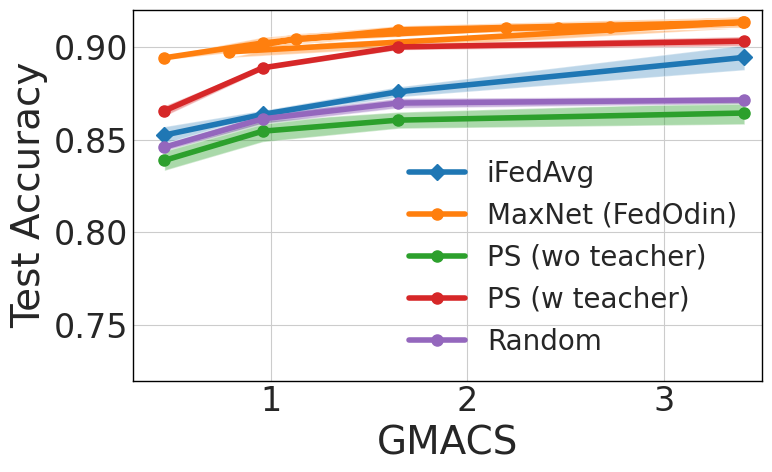

In [328]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4],
                ["PS (wo teacher)", 0.4],
                ["PS (w teacher)", 0.4],
                ["Random", 0.5]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.72, 0.92, 1500, "cifar10_alph100.pdf", markers=['D', 'o', 'o', 'o', 'o'])

In [329]:
print(ws_pareto, "\n", error_ws_pareto)

          MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)    Random
0.460000          0.894197         0.838833        0.865567  0.845954
0.789271          0.897403              NaN             NaN       NaN
0.960000          0.902210         0.854600        0.888800  0.861245
1.129009          0.904581              NaN             NaN       NaN
1.650000          0.909288         0.860567        0.900067  0.869792
2.200130          0.910023              NaN             NaN       NaN
2.464371          0.910524              NaN             NaN       NaN
2.728612          0.910958              NaN             NaN       NaN
3.403370          0.913395              NaN             NaN       NaN
3.410000          0.913395         0.864400        0.903200  0.871428 
           MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)    Random
0.460000          0.001089         0.005380        0.002774  0.001906
0.789271          0.002990              NaN             NaN       NaN
0.960000          

## Random Ablation

In [330]:
name_modifier = {"Wt β-decay + TS (Maxnet)":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                "overlap":"./MultiSeedCSVs/alph100_cifar10_random.csv",
                "overlap + S":"./MultiSeedCSVs/alph100_cifar10_sandwich.csv",
                "overlap + TS":"./MultiSeedCSVs/alph100_cifar10_TS.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"],
                                        ["flofa/cifar10-cleaned/wvbq5byq", "flofa/cifar10-cleaned/2odkw0kg", "flofa/cifar10-cleaned/mpmp3lxm"]], 
                                        1500, ["Wt β-decay + TS (Maxnet)", "overlap"], modify_names=name_modifier)

Wt β-decay + TS (Maxnet) pareto generation running...
overlap pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  Wt β-decay + TS (Maxnet)   overlap
0.460000  0.852497                  0.894197  0.845954
0.960000  0.863649                  0.902210  0.861245
1.650000  0.875868                  0.909288  0.869792
3.410000  0.894431                  0.913395  0.871428
0.789271       NaN                  0.897403  0.854634
1.129009       NaN                  0.904581  0.864450
2.200130       NaN                  0.910023  0.869892
2.464371       NaN                  0.910524  0.870726
2.728612       NaN                  0.910958  0.870593
3.403370       NaN                  0.913395       NaN


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

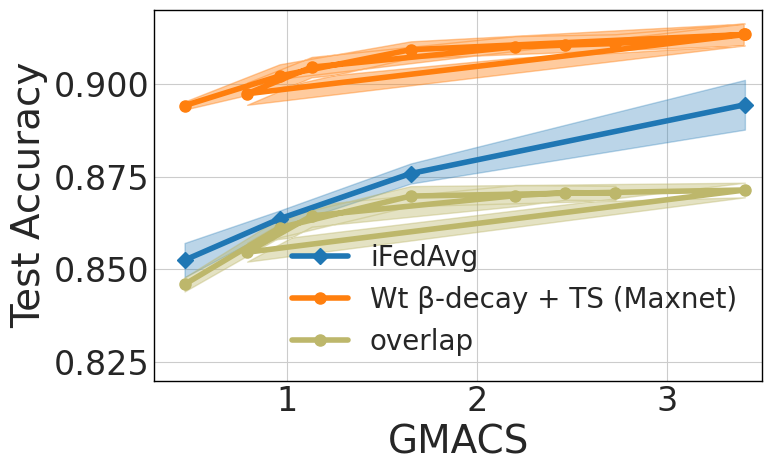

In [331]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["Wt β-decay + TS (Maxnet)", 0.4],
                ["overlap", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.82, 0.92, 1500, 
         "cifar10_Random_Ablation.pdf",  colors=[u'#1f77b4', u'#ff7f0e', "darkkhaki"], markers=['D', 'o', 'o'])

## Sandwich Ablation

In [332]:
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], 
                                         ["flofa/cifar10-cleaned/393zn5kh", "flofa/cifar10-cleaned/nitt61ry", "flofa/cifar10-cleaned/38we3pgw"],
                                         ["flofa/cifar10-cleaned/28kmsgaq", "flofa/cifar10-cleaned/144ewb9c", "flofa/cifar10-cleaned/3qywbymq"],
                                        ["flofa/cifar10-cleaned/wvbq5byq", "flofa/cifar10-cleaned/2odkw0kg", "flofa/cifar10-cleaned/mpmp3lxm"]], 
                                        1500, ["Wt β-decay + TS (Maxnet)", "overlap + TS", "overlap + S", "overlap + R"], modify_names=name_modifier)

Wt β-decay + TS (Maxnet) pareto generation running...
overlap + TS pareto generation running...
overlap + S pareto generation running...
overlap + R pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  Wt β-decay + TS (Maxnet)  overlap + TS  overlap + S  \
0.460000  0.852497                  0.894197      0.854734     0.854868   
0.960000  0.863649                  0.902210      0.858674     0.858173   
1.650000  0.875868                  0.909288      0.864917     0.863482   
3.410000  0.894431                  0.913395      0.866720     0.865084   
0.789271       NaN                  0.897403      0.855536     0.853132   
1.129009       NaN                  0.904581      0.861378     0.859108   
2.200130       NaN                  0.910023      0.866486     0.864083   
2.464371       NaN                  0.910524      0.866420     0.864750   
2.728612       NaN                  0.910958      0.866153     0.864650   
3.403370       NaN                  0.913395           NaN          NaN   

          overlap + R  
0.460000     0.845954  
0.960000     0.861245  
1.650000     0.869792  
3.410000     0.871428  
0.789271          NaN  
1.129009          NaN  
2.2001

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

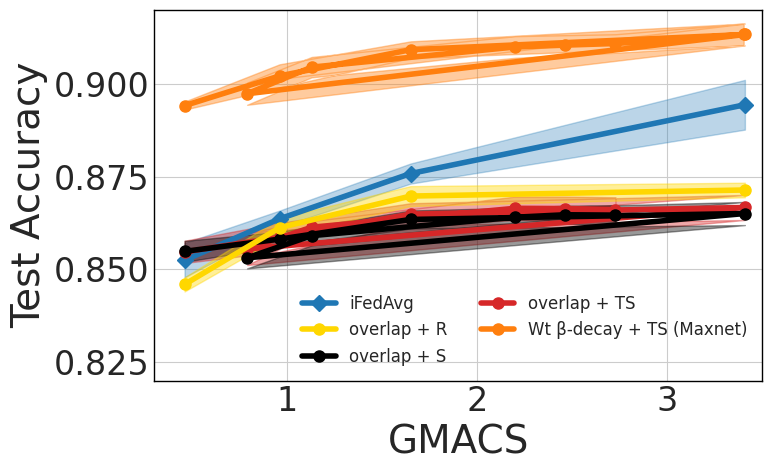

In [333]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["Wt β-decay + TS (Maxnet)", 0.4],
                ["overlap + TS", 0.4],
                ["overlap + S", 0.4],
                ["overlap + R", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.82, 0.92, 1500, 
         "cifar10_Sandwich_Ablation.pdf", colors=[u'#1f77b4', u'#ff7f0e', u'#d62728', u'#000000', "gold"], 
         leg_font_size=12, ncol=2, leg_ordering=[0, 4, 3, 2, 1], markers=['D','o', 'o', 'o', 'o'])

## BETA ABLATION

In [334]:
name_modifier = {r"$\beta_0$=0.9":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                r"$\beta_0$=0.5":"./MultiSeedCSVs/alph100_cifar10_maxnetcosB5e-2.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"],
                                        ["flofa/cifar10-cleaned/2yi6gdma", "flofa/cifar10-cleaned/1qq7zru3", "flofa/cifar10-cleaned/11v27nx4"]], 
                                        1500, [r"$\beta_0$=0.9", r"$\beta_0$=0.5"], modify_names=name_modifier)

$\beta_0$=0.9 pareto generation running...
$\beta_0$=0.5 pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


          $\beta_0$=0.9  $\beta_0$=0.5
0.460000       0.894197       0.866052
0.789271       0.897403       0.868089
0.960000       0.902210       0.871962
1.129009       0.904581       0.872930
1.650000       0.909288       0.877604
2.200130       0.910023       0.878339
2.464371       0.910524       0.879107
2.728612       0.910958       0.878706
3.403370       0.913395            NaN
3.410000       0.913395       0.879574


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

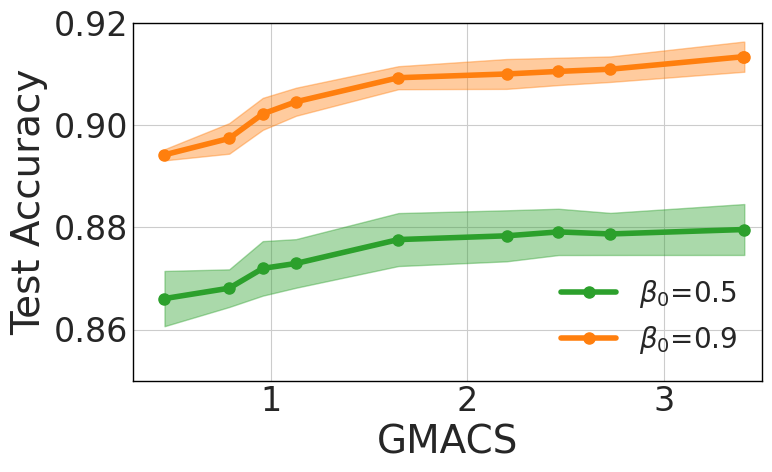

In [335]:
ax_fill_list = [[r"$\beta_0$=0.9", 0.4],
                [r"$\beta_0$=0.5", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.85, 0.92, 1500, 
         "cifar10_Beta_Ablation.pdf", exclude_fedavg=True, colors=[u'#ff7f0e', u'#2ca02c'], leg_ordering=[1,0])

## Decay Period Ablation

In [336]:
name_modifier = {"80%":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                "50%":"./MultiSeedCSVs/alph100_cifar10_maxnetcos50%.csv",
                "100%":"./MultiSeedCSVs/alph100_cifar10_maxnetcos100%.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/238zgiwi", "flofa/cifar10-cleaned/mzsfxesx", "flofa/cifar10-cleaned/6n2xd1h3"],
                                         ["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], 
                                         ["flofa/cifar10-cleaned/3re1hdm8", "flofa/cifar10-cleaned/2dhr6xmn", "flofa/cifar10-cleaned/1smenfz2"]], 
                                        1500, ["50%", "80%", "100%"], modify_names=name_modifier)

50% pareto generation running...
80% pareto generation running...
100% pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

               50%       80%      100%
0.460000  0.892394  0.894197  0.896668
0.789271  0.895833  0.897403  0.897503
0.960000  0.899873  0.902210  0.902310
1.129009  0.902344  0.904581  0.905248
1.650000  0.905916  0.909288  0.910023
2.200130  0.905449  0.910023  0.909689
2.464371  0.906350  0.910524  0.911358
2.728612  0.906918  0.910958  0.911425
3.410000  0.908854  0.913395  0.913829
3.403370       NaN  0.913395       NaN


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

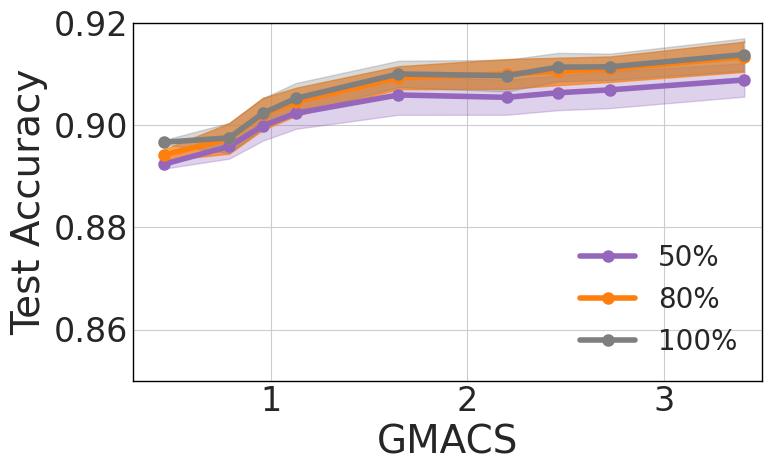

In [337]:
ax_fill_list = [["50%", 0.3],
                ["80%", 0.7],
                ["100%", 0.3],
               ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.85, 0.92, 1500, 
         "cifar10_Decay_Period_Ablation.pdf", exclude_fedavg=True, colors=[u'#9467bd', u'#ff7f0e', u'#7f7f7f'])

## Decay Schedule Ablation

In [338]:
name_modifier = {"Cosine":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                "Linear":"./MultiSeedCSVs/alph100_cifar10_maxnetlin.csv",
                "Constant": "./MultiSeedCSVs/alph100_cifar10_maxnetfixed.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"], 
                                         ["flofa/cifar10-cleaned/3poelo9h", "flofa/cifar10-cleaned/1ey7g0fi", "flofa/cifar10-cleaned/uro8mh7l"],
                                         ["flofa/cifar10-cleaned/2szgylog", "flofa/cifar10-cleaned/1yvmo9qk", "flofa/cifar10-cleaned/1mrchviw"]], 
                                        1500, ["Cosine", "Linear", "Constant"], modify_names=name_modifier)

Cosine pareto generation running...
Linear pareto generation running...
Constant pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

            Cosine    Linear  Constant
0.460000  0.894197  0.892461  0.858540
0.789271  0.897403  0.894832  0.866052
0.960000  0.902210  0.899139  0.878405
1.129009  0.904581  0.901376  0.882946
1.650000  0.909288  0.905616  0.897269
2.200130  0.910023  0.906651  0.893530
2.464371  0.910524  0.907485  0.895733
2.728612  0.910958  0.908186  0.898137
3.403370  0.913395       NaN       NaN
3.410000  0.913395  0.911024  0.911458


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

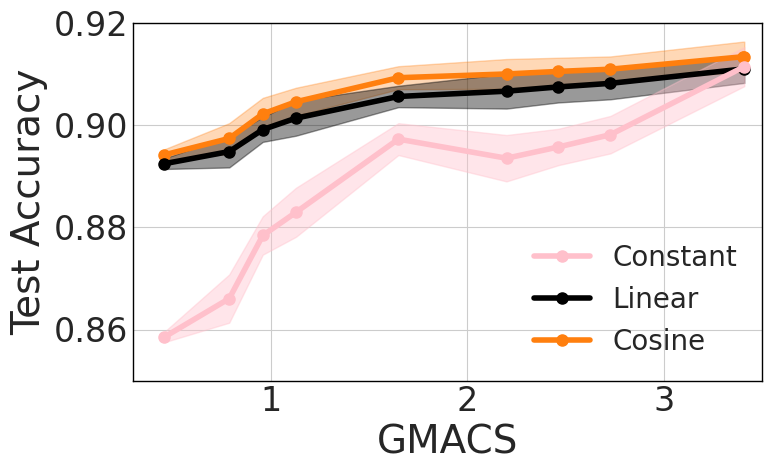

In [339]:
ax_fill_list = [["Cosine", 0.3],
                ["Linear", 0.4],
                ["Constant", 0.4],
               ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.85, 0.92, 1500, 
         "cifar10_Decay_Schedule_Ablation.pdf", exclude_fedavg=True, colors=[u'#ff7f0e', u'#000000', u'#ffc0cb'], leg_ordering=[2,1,0])

## ALPHA 1

In [340]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/1vuuxb70", "flofa/cifar10-cleaned/1k3afvvl", "flofa/cifar10-cleaned/g97o8xn9"],
                                             ["flofa/cifar10-cleaned/1vzldwn3", "flofa/cifar10-cleaned/32iq5inb", "flofa/cifar10-cleaned/291qcx0y"],
                                             ["flofa/cifar10-cleaned/2ydg2n5i", "flofa/cifar10-cleaned/wl7fq3id", "flofa/cifar10-cleaned/1mfbpgoa"],
                                             ["flofa/cifar10-cleaned/1j9z3d6y", "flofa/cifar10-cleaned/3itxp4ic", "flofa/cifar10-cleaned/2e60ehp0"],
                                           uptil_r=1500)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cifar10-cleaned/3hybhfbp", "flofa/cifar10-cleaned/fhv1fj9r", "flofa/cifar10-cleaned/mem1kdfw"],
                                           ["flofa/cifar10-cleaned/3mrxjrxp", "flofa/cifar10-cleaned/40tzuqnw", "flofa/cifar10-cleaned/87mk86g0"],
                                           ["flofa/cifar10-cleaned/1zog2xa6", "flofa/cifar10-cleaned/8u7w40db", "flofa/cifar10-cleaned/clvvfv8g"],
                                           uptil_r=1500)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph1_cifar10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/1ujgbi87", "flofa/cifar10-cleaned/364bxz9r", "flofa/cifar10-cleaned/8ka6r39j"]], 1500, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.834168       NaN          0.886852
0.960000  0.846488       NaN          0.892962
1.650000  0.861412       NaN          0.903646
3.410000  0.878839       NaN          0.909088
0.670000       NaN  0.713833               NaN
1.820000       NaN  0.821300               NaN
3.660000       NaN  0.858533               NaN
0.789271       NaN       NaN          0.890458
1.129009       NaN       NaN          0.898872
2.200130       NaN       NaN          0.906550
2.464371       NaN       NaN          0.908086
2.728612       NaN       NaN          0.908954


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

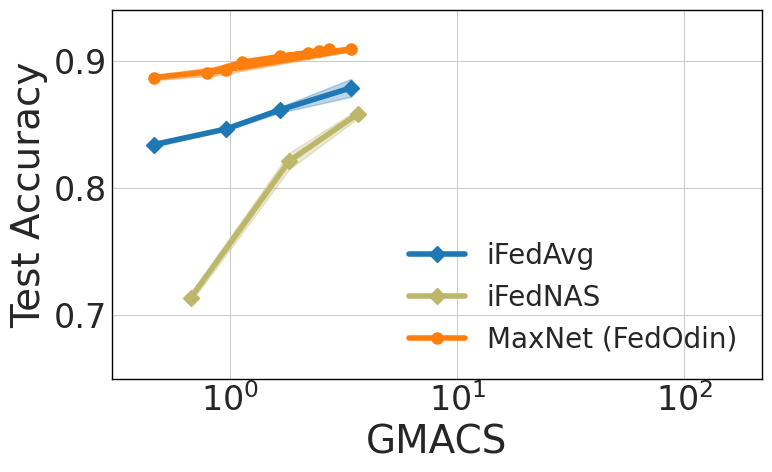

In [341]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.65, 0.94, 1500, "cifar10_alph1.pdf", markers=['D', 'D', 'o'], fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [342]:
ws_pareto_2, error_ws_pareto_2 = ws_paretos([["flofa/cifar10-cleaned/1ujgbi87", "flofa/cifar10-cleaned/364bxz9r", "flofa/cifar10-cleaned/8ka6r39j"], 
                                             ["flofa/cifar10-cleaned/22sdg6vq", "flofa/cifar10-cleaned/3igdauo0", "flofa/cifar10-cleaned/181vlnxu"],
                                             ["flofa/cifar10-cleaned/742psagk", "flofa/cifar10-cleaned/3thpnwcq", "flofa/cifar10-cleaned/28vv2kpe"],
                                             ["flofa/cifar10-cleaned/2cipvcp4", "flofa/cifar10-cleaned/2fixiepc", "flofa/cifar10-cleaned/2ebp2n65"]], 1500, ["MaxNet (FedOdin)", "PS (w/o teacher)", "PS (w teacher)", "Random"], modify_names=name_modifier)

MaxNet (FedOdin) pareto generation running...
PS (w/o teacher) pareto generation running...
PS (w teacher) pareto generation running...
Random pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)  PS (w/o teacher)  PS (w teacher)  \
0.460000  0.834168          0.886852          0.821367        0.901733   
0.960000  0.846488          0.892962          0.842500        0.909767   
1.650000  0.861412          0.903646          0.847533        0.918700   
3.410000  0.878839          0.909088          0.851733        0.919400   
0.789271       NaN          0.890458               NaN             NaN   
1.129009       NaN          0.898872               NaN             NaN   
2.200130       NaN          0.906550               NaN             NaN   
2.464371       NaN          0.908086               NaN             NaN   
2.728612       NaN          0.908954               NaN             NaN   

            Random  
0.460000  0.831664  
0.960000  0.846087  
1.650000  0.857706  
3.410000  0.860276  
0.789271       NaN  
1.129009       NaN  
2.200130       NaN  
2.464371       NaN  
2.728612       NaN  


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

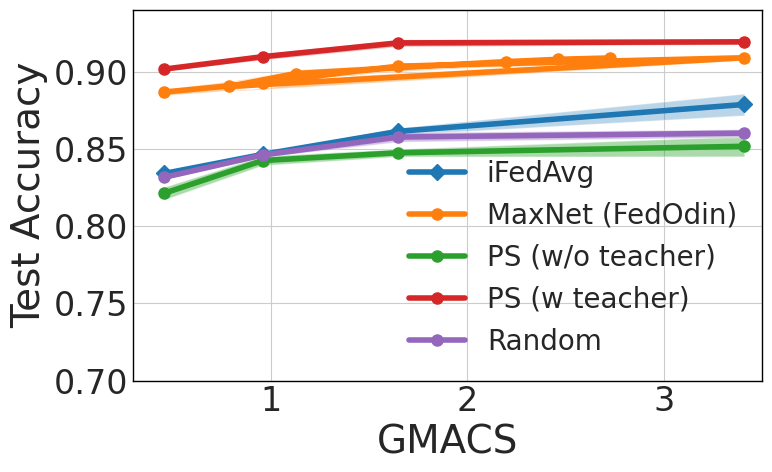

In [343]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4],
                ["PS (w/o teacher)", 0.4],
                ["PS (w teacher)", 0.4],
                ["Random", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto_2, error_ws_pareto_2, ax_fill_list, 0.70, 0.94, 1500, "cifar10_alph1.pdf", markers=['D', 'o', 'o', 'o', 'o'])
                

In [344]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.834168
0.96    0.846488
1.65    0.861412
3.41    0.878839
Name: iFedAvg, dtype: float64 
 0.46    0.001919
0.96    0.001086
1.65    0.002252
3.41    0.007029
Name: iFedAvg, dtype: float64


In [345]:
print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.713833
1.82    0.821300
3.66    0.858533
Name: iFedNAS, dtype: float64 
 0.67    0.003653
1.82    0.006492
3.66    0.003480
Name: iFedNAS, dtype: float64


In [346]:
print(ws_pareto_2, "\n", error_ws_pareto_2)

          MaxNet (FedOdin)  PS (w/o teacher)  PS (w teacher)    Random
0.460000          0.886852          0.821367        0.901733  0.831664
0.789271          0.890458               NaN             NaN       NaN
0.960000          0.892962          0.842500        0.909767  0.846087
1.129009          0.898872               NaN             NaN       NaN
1.650000          0.903646          0.847533        0.918700  0.857706
2.200130          0.906550               NaN             NaN       NaN
2.464371          0.908086               NaN             NaN       NaN
2.728612          0.908954               NaN             NaN       NaN
3.410000          0.909088          0.851733        0.919400  0.860276 
           MaxNet (FedOdin)  PS (w/o teacher)  PS (w teacher)    Random
0.460000          0.002010          0.004125        0.001159  0.001270
0.789271          0.003049               NaN             NaN       NaN
0.960000          0.003524          0.003041        0.001991  0.001372
1.12

## ALPHA 0.1

In [347]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/27j50twd", "flofa/cifar10-cleaned/1a7gzyu9", "flofa/cifar10-cleaned/m6k8qjuz"],
                             ["flofa/cifar10-cleaned/23nhaupz", "flofa/cifar10-cleaned/n8vmnxo6", "flofa/cifar10-cleaned/nd3b9qmt"],
                             ["flofa/cifar10-cleaned/30b637qd", "flofa/cifar10-cleaned/2iheisom", "flofa/cifar10-cleaned/2bdp7b7d"],
                             ["flofa/cifar10-cleaned/15c4lbau", "flofa/cifar10-cleaned/2u6haggv", "flofa/cifar10-cleaned/jj38xqdk"],
                                           uptil_r=2500)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cifar10-cleaned/3tbonhp6", "flofa/cifar10-cleaned/2xse6r99", "flofa/cifar10-cleaned/1ue1hfhq"],
                                           ["flofa/cifar10-cleaned/jufh0ykc", "flofa/cifar10-cleaned/1j4srpwp", "flofa/cifar10-cleaned/3nzcwy9p"],
                                           ["flofa/cifar10-cleaned/p25qeb58", "flofa/cifar10-cleaned/1b2nr4re"],
                                           uptil_r=2500)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph1e-1_cifar10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/nk52joxt", "flofa/cifar10-cleaned/36j4ycqu", "flofa/cifar10-cleaned/2jn1uqyy"]], 2500, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.771468       NaN          0.818109
0.960000  0.779915       NaN          0.832732
1.650000  0.799312       NaN          0.841012
3.410000  0.812433       NaN          0.847189
0.670000       NaN  0.515667               NaN
1.820000       NaN  0.650300               NaN
3.660000       NaN  0.681250               NaN
0.789271       NaN       NaN          0.829828
1.129009       NaN       NaN          0.832131
2.200130       NaN       NaN          0.844184
2.464371       NaN       NaN          0.846054
2.728612       NaN       NaN          0.846788


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

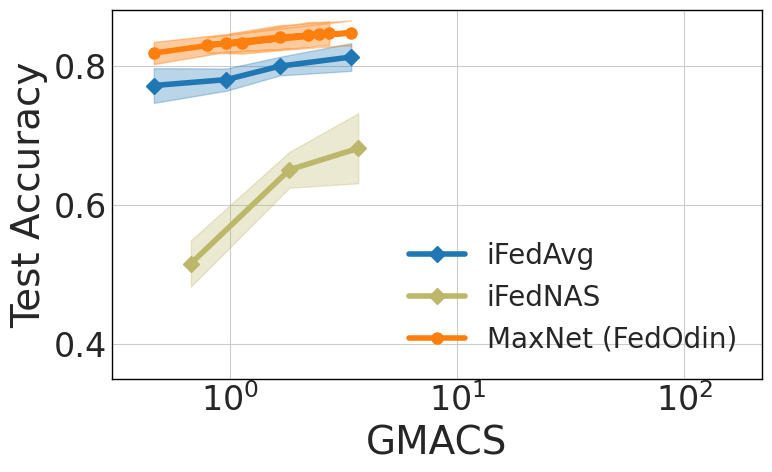

In [348]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.35, 0.88, 2500, "cifar10_alph0_1.pdf", markers=['D', 'D', 'o'], fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [349]:
ws_pareto_2, error_ws_pareto_2 = ws_paretos([["flofa/cifar10-cleaned/nk52joxt", "flofa/cifar10-cleaned/36j4ycqu", "flofa/cifar10-cleaned/2jn1uqyy"], 
                                             ["flofa/cifar10-cleaned/bwcpftsc", "flofa/cifar10-cleaned/bonxwyqg", "flofa/cifar10-cleaned/3w2rn22g"], 
                                             ["flofa/cifar10-cleaned/1udbb1fg", "flofa/cifar10-cleaned/3uhut1we", "flofa/cifar10-cleaned/3n8w9glb"],
                                             ["flofa/cifar10-cleaned/1dj55jyl", "flofa/cifar10-cleaned/3ukvdl7i", "flofa/cifar10-cleaned/s80s09by"]], 2500, ["MaxNet (FedOdin)", "PS (wo teacher)", "PS (w teacher)", "Random"], modify_names=name_modifier)

MaxNet (FedOdin) pareto generation running...
PS (wo teacher) pareto generation running...
PS (w teacher) pareto generation running...
Random pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)  \
0.460000  0.771468          0.818109         0.735900        0.813867   
0.960000  0.779915          0.832732         0.767233        0.833367   
1.650000  0.799312          0.841012         0.771200        0.850233   
3.410000  0.812433          0.847189         0.774500        0.848833   
0.789271       NaN          0.829828              NaN             NaN   
1.129009       NaN          0.832131              NaN             NaN   
2.200130       NaN          0.844184              NaN             NaN   
2.464371       NaN          0.846054              NaN             NaN   
2.728612       NaN          0.846788              NaN             NaN   

            Random  
0.460000  0.762821  
0.960000  0.784221  
1.650000  0.796741  
3.410000  0.800214  
0.789271       NaN  
1.129009       NaN  
2.200130       NaN  
2.464371       NaN  
2.728612       NaN  


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

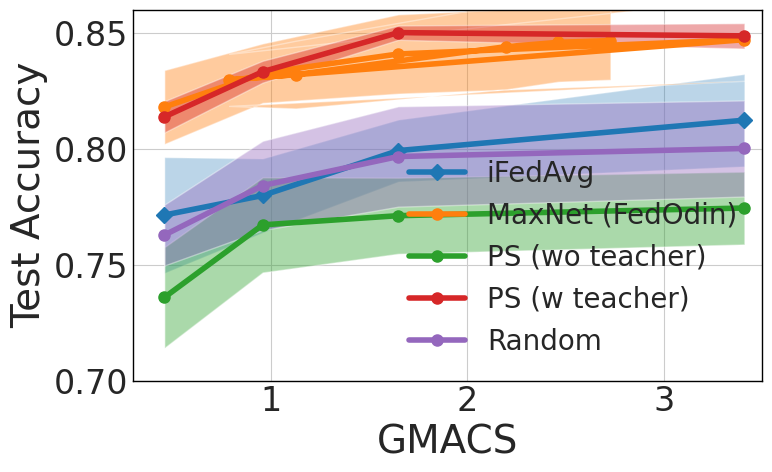

In [350]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4],
                ["PS (wo teacher)", 0.4],
                ["PS (w teacher)", 0.4],
                ["Random", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto_2, error_ws_pareto_2, ax_fill_list, 0.7, 0.86, 2500, "cifar10_alph0_1.pdf", markers=['D', 'o', 'o', 'o', 'o'])
                

In [351]:
print(ws_pareto_2, "\n", error_ws_pareto_2)

          MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)    Random
0.460000          0.818109         0.735900        0.813867  0.762821
0.789271          0.829828              NaN             NaN       NaN
0.960000          0.832732         0.767233        0.833367  0.784221
1.129009          0.832131              NaN             NaN       NaN
1.650000          0.841012         0.771200        0.850233  0.796741
2.200130          0.844184              NaN             NaN       NaN
2.464371          0.846054              NaN             NaN       NaN
2.728612          0.846788              NaN             NaN       NaN
3.410000          0.847189         0.774500        0.848833  0.800214 
           MaxNet (FedOdin)  PS (wo teacher)  PS (w teacher)    Random
0.460000          0.015929         0.021733        0.006746  0.013144
0.789271          0.011236              NaN             NaN       NaN
0.960000          0.012808         0.020514        0.004715  0.019261
1.129009          

In [352]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.771468
0.96    0.779915
1.65    0.799312
3.41    0.812433
Name: iFedAvg, dtype: float64 
 0.46    0.024984
0.96    0.015959
1.65    0.013352
3.41    0.019908
Name: iFedAvg, dtype: float64


In [353]:
print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.515667
1.82    0.650300
3.66    0.681250
Name: iFedNAS, dtype: float64 
 0.67    0.033246
1.82    0.025743
3.66    0.050350
Name: iFedNAS, dtype: float64


## C=0.2

In [354]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/3ouce0tb", "flofa/cifar10-cleaned/33mehqjg", "flofa/cifar10-cleaned/3v1iijhj"],
                               ["flofa/cifar10-cleaned/gkifku63", "flofa/cifar10-cleaned/2jj4pv27", "flofa/cifar10-cleaned/1v4hi7oo"],
                               ["flofa/cifar10-cleaned/1dg5e6zv", "flofa/cifar10-cleaned/jcc79knd", "flofa/cifar10-cleaned/2x9aq7tn"],
                               ["flofa/cifar10-cleaned/kq86co8r", "flofa/cifar10-cleaned/25q00xtx", "flofa/cifar10-cleaned/2zhvr5sw"],
                                           uptil_r=1500)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cifar10-cleaned/qz7k8qz3", "flofa/cifar10-cleaned/3j5xy7dt", "flofa/cifar10-cleaned/1i6w9rff"],
                                           ["flofa/cifar10-cleaned/dqg9rkoq", "flofa/cifar10-cleaned/2uo0l9ep", "flofa/cifar10-cleaned/3bly37ez"],
                                           ["flofa/cifar10-cleaned/321hfhgt", "flofa/cifar10-cleaned/1km8hn2o", "flofa/cifar10-cleaned/2opus4pg"],
                                           uptil_r=1500)

name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar10_C2e-1_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/14oei8o9", "flofa/cifar10-cleaned/lyjoybcg", "flofa/cifar10-cleaned/3l433qxb"]], 1500, ["MaxNet (FedOdin)"], modify_names=name_modifier, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

TypeError: ws_paretos() got an unexpected keyword argument 'colors'

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.855936       NaN          0.818109
0.960000  0.870059       NaN          0.832732
1.650000  0.880375       NaN          0.841012
3.410000  0.899573       NaN          0.847189
0.670000       NaN  0.762300               NaN
1.820000       NaN  0.846533               NaN
3.660000       NaN  0.880000               NaN
0.789271       NaN       NaN          0.829828
1.129009       NaN       NaN          0.832131
2.200130       NaN       NaN          0.844184
2.464371       NaN       NaN          0.846054
2.728612       NaN       NaN          0.846788


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

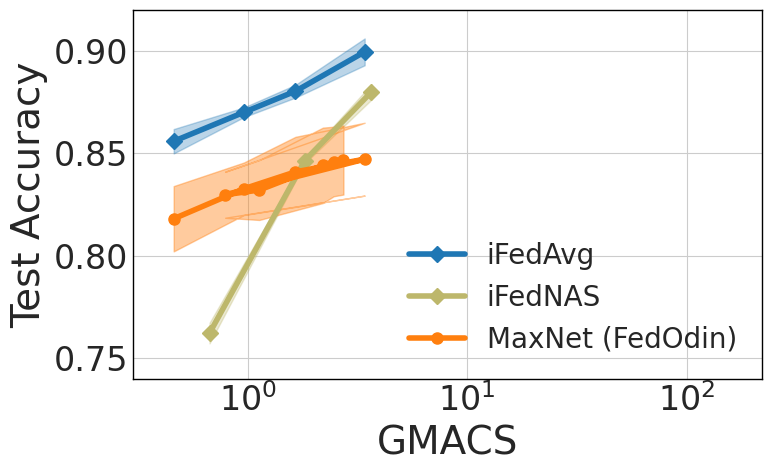

In [355]:
ax_fill_list = [["iFedAvg", 0.3],
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.74, 0.92, 1500, "cifar10_c0_2.pdf", fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, markers=['D', 'D', 'o'], xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [356]:
print(ws_pareto, "\n", error_ws_pareto)

          MaxNet (FedOdin)
0.460000          0.818109
0.789271          0.829828
0.960000          0.832732
1.129009          0.832131
1.650000          0.841012
2.200130          0.844184
2.464371          0.846054
2.728612          0.846788
3.410000          0.847189 
           MaxNet (FedOdin)
0.460000          0.015929
0.789271          0.011236
0.960000          0.012808
1.129009          0.014617
1.650000          0.017083
2.200130          0.018401
2.464371          0.016973
2.728612          0.016860
3.410000          0.017776


In [357]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.855936
0.96    0.870059
1.65    0.880375
3.41    0.899573
Name: iFedAvg, dtype: float64 
 0.46    0.005943
0.96    0.002365
1.65    0.003119
3.41    0.006545
Name: iFedAvg, dtype: float64


In [358]:
print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.762300
1.82    0.846533
3.66    0.880000
Name: iFedNAS, dtype: float64 
 0.67    0.005022
1.82    0.001377
3.66    0.003769
Name: iFedNAS, dtype: float64


## C=0.4

In [359]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                                           ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                                           ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                                           ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"],
                                           uptil_r=1500)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"]], 1500, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)
0.460000  0.852497          0.894197
0.960000  0.863649          0.902210
1.650000  0.875868          0.909288
3.410000  0.894431          0.913395
0.789271       NaN          0.897403
1.129009       NaN          0.904581
2.200130       NaN          0.910023
2.464371       NaN          0.910524
2.728612       NaN          0.910958
3.403370       NaN          0.913395


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

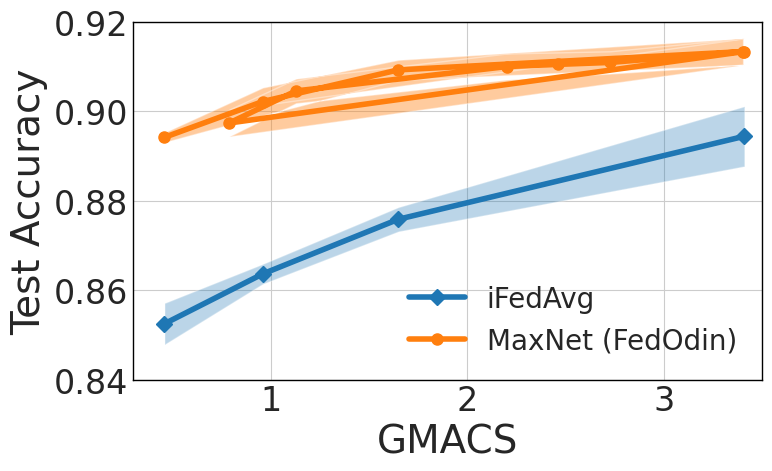

In [360]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.84, 0.92, 1500, "cifar10_c0_4.pdf", markers=['D', 'o'])

## C=0.8

In [361]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/2b9jlvt4", "flofa/cifar10-cleaned/2lgtjhlt", "flofa/cifar10-cleaned/1ea4h5xa"],
                               ["flofa/cifar10-cleaned/1x3ey55q", "flofa/cifar10-cleaned/2jf6fdgu", "flofa/cifar10-cleaned/2yqp563k"],
                               ["flofa/cifar10-cleaned/tftsoh1o", "flofa/cifar10-cleaned/3cm2g4so", "flofa/cifar10-cleaned/1vco5o8c"],
                               ["flofa/cifar10-cleaned/1i1x31b6", "flofa/cifar10-cleaned/2q86u8f1", "flofa/cifar10-cleaned/2mqxkdi6"],
                                           uptil_r=1000)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar10_C8e-1_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3dc5s99r", "flofa/cifar10-cleaned/2uzu4gqw", "flofa/cifar10-cleaned/25qfm9qg"]], 1000, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)
0.460000  0.849927          0.887921
0.960000  0.860677          0.897135
1.650000  0.872997          0.907085
3.410000  0.891126          0.912627
0.789271       NaN          0.891126
1.129009       NaN          0.901409
2.200130       NaN          0.907252
2.464371       NaN          0.909288
2.728612       NaN          0.909655


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

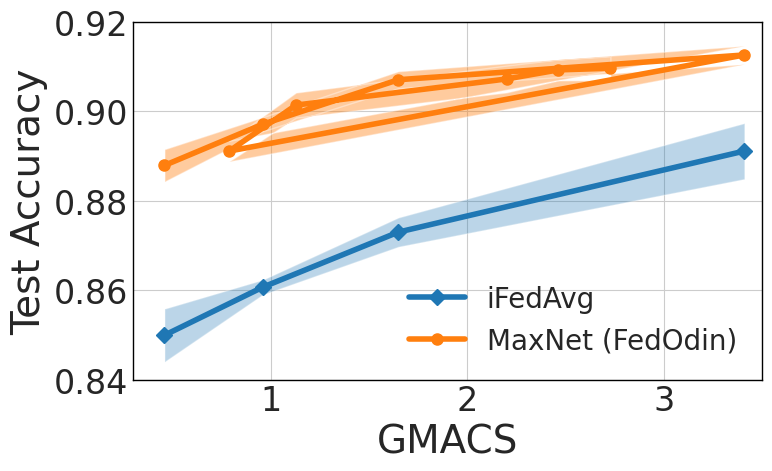

In [362]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.84, 0.92, 1000, "cifar10_c0_8.pdf", markers=['D', 'o'])

# CIFAR100

In [363]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar100-nobn-wd=0/p5d9gl3s", "flofa/cifar100-nobn-wd=0/1p5d70qu", "flofa/cifar100-nobn-wd=0/3ixum4tv"],
                                   ["flofa/cifar100-nobn-wd=0/o01aa4m7", "flofa/cifar100-nobn-wd=0/2xoeu3hw", "flofa/cifar100-nobn-wd=0/2lphr7zp"],
                                   ["flofa/cifar100-nobn-wd=0/pw48xdek", "flofa/cifar100-nobn-wd=0/zsitdj8r", "flofa/cifar100-nobn-wd=0/fryupz3v"],
                                   ["flofa/cifar100-nobn-wd=0/23zgzqs1", "flofa/cifar100-nobn-wd=0/979hk7eb", "flofa/cifar100-nobn-wd=0/1q1fa437"],
                                           uptil_r=2000)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cifar100-nobn-wd=0/1ueynqlf", "flofa/cifar100-nobn-wd=0/18p4ejks", "flofa/cifar100-nobn-wd=0/3rhkt8fk"],
                                           ["flofa/cifar100-nobn-wd=0/20kwhj16", "flofa/cifar100-nobn-wd=0/qflxunz7", "flofa/cifar100-nobn-wd=0/sxbx7mkb"],
                                           ["flofa/cifar100-nobn-wd=0/2vannwcd", "flofa/cifar100-nobn-wd=0/180wywal", "flofa/cifar100-nobn-wd=0/3k35hr7g"],
                                           uptil_r=2000, subnet_ordering_internal=subnet_ordering_darts_2)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cifar100_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar100-nobn-wd=0/15ozx62j", "flofa/cifar100-nobn-wd=0/7owa1nnx", "flofa/cifar100-nobn-wd=0/2c7uul0m"]], 2000, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNet (FedOdin)
0.460000  0.431858          0.563499
0.960000  0.439236          0.571638
1.650000  0.441440          0.578476
3.410000  0.449953          0.582546
0.789455       NaN          0.480936
1.129193       NaN          0.486779
2.200314       NaN          0.490051
2.464555       NaN          0.491420
2.728796       NaN          0.491854


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

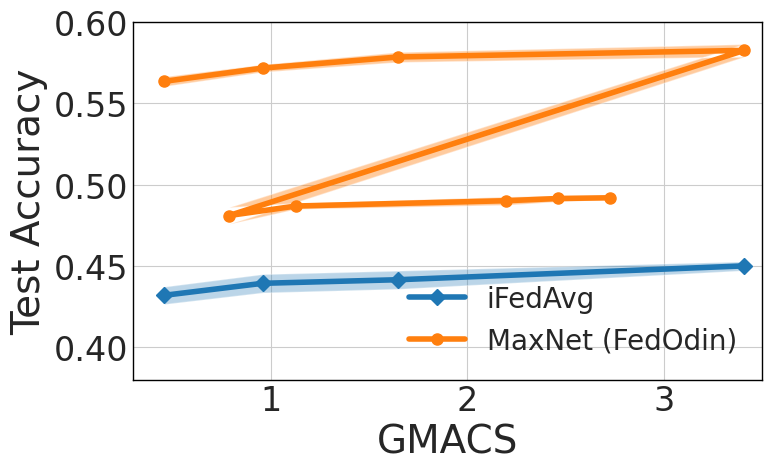

In [364]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["MaxNet (FedOdin)", 0.4],
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.38, 0.6, 2000, "cifar100_alph00.pdf", markers=['D', 'o'])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.431858       NaN          0.563499
0.960000  0.439236       NaN          0.571638
1.650000  0.441440       NaN          0.578476
3.410000  0.449953       NaN          0.582546
0.670000       NaN  0.409200               NaN
1.820000       NaN  0.558167               NaN
3.660000       NaN  0.583867               NaN
0.789455       NaN       NaN          0.480936
1.129193       NaN       NaN          0.486779
2.200314       NaN       NaN          0.490051
2.464555       NaN       NaN          0.491420
2.728796       NaN       NaN          0.491854


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

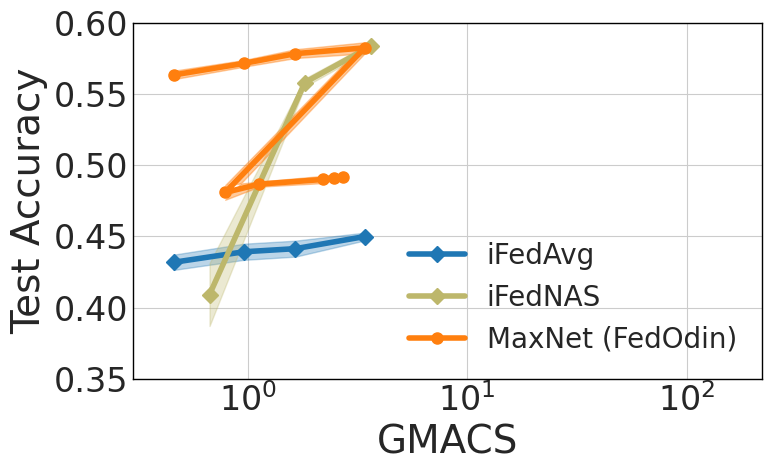

In [365]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.35, 0.6, 2000, "cifar100_alph100.pdf", markers=['D', 'D', 'o'], fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [366]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.431858
0.96    0.439236
1.65    0.441440
3.41    0.449953
Name: iFedAvg, dtype: float64 
 0.46    0.005369
0.96    0.005676
1.65    0.005605
3.41    0.002740
Name: iFedAvg, dtype: float64


In [367]:
print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.409200
1.82    0.558167
3.66    0.583867
Name: iFedNAS, dtype: float64 
 0.67    0.022100
1.82    0.002869
3.66    0.002344
Name: iFedNAS, dtype: float64


In [368]:
print(ws_pareto, "\n", error_ws_pareto)

          MaxNet (FedOdin)
0.460000          0.563499
0.789455          0.480936
0.960000          0.571638
1.129193          0.486779
1.650000          0.578476
2.200314          0.490051
2.464555          0.491420
2.728796          0.491854
3.410000          0.582546 
           MaxNet (FedOdin)
0.460000          0.002971
0.789455          0.005148
0.960000          0.002332
1.129193          0.001771
1.650000          0.003091
2.200314          0.002536
2.464555          0.001809
2.728796          0.001080
3.410000          0.003871


# CINIC10

In [369]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cinic10/hossv49n", "flofa/cinic10/usjq7224", "flofa/cinic10/1h7gw16y"],
                                           ["flofa/cinic10/1ujyzizt", "flofa/cinic10/1ipngyw9", "flofa/cinic10/2bz5olfn"],
                                           ["flofa/cinic10/3p0btr7a", "flofa/cinic10/2taad3ox", "flofa/cinic10/cdojw42s"],
                                           ["flofa/cinic10/q1y0w0p1", "flofa/cinic10/2j3iyfwt", "flofa/cinic10/1t9scji7"],
                                           uptil_r=1000)
fednas_pareto, error_fednas_pareto = fednas_paretos(["flofa/cinic10/4rl00j8f", "flofa/cinic10/5bwk37sm", "flofa/cinic10/273agpoj"],
                                           ["flofa/cinic10/tnspumbk", "flofa/cinic10/3uofrxfm", "flofa/cinic10/foz5x9u6"],
                                           ["flofa/cinic10/3cvw15dr", "flofa/cinic10/cdplfrl5", "flofa/cinic10/208eot1e"],
                                           uptil_r=1000, subnet_ordering_internal=subnet_ordering_darts_2)
name_modifier = {"MaxNet (FedOdin)":"./MultiSeedCSVs/alph100_cinic10_maxnetcos.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cinic10/1jy50ir2", "flofa/cinic10/1dz9934e", "flofa/cinic10/saj8oq0j"]], 1000, ["MaxNet (FedOdin)"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fednas pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNet (FedOdin) pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg   iFedNAS  MaxNet (FedOdin)
0.460000  0.617647       NaN          0.731174
0.960000  0.630023       NaN          0.744970
1.650000  0.639973       NaN          0.750841
3.410000  0.660151       NaN          0.753841
0.670000       NaN  0.581541               NaN
1.820000       NaN  0.699733               NaN
3.660000       NaN  0.719285               NaN
0.789271       NaN       NaN          0.667596
1.129009       NaN       NaN          0.677602
2.200130       NaN       NaN          0.689067
2.464371       NaN       NaN          0.691056
2.728612       NaN       NaN          0.689193


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

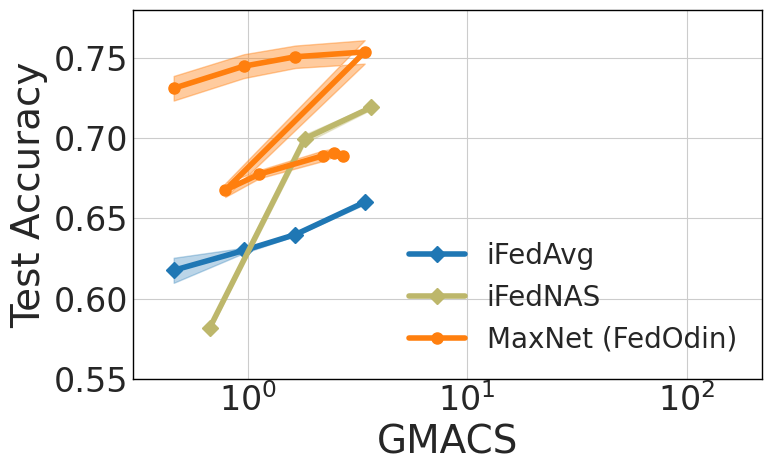

In [370]:
ax_fill_list = [["iFedAvg", 0.3], 
                ["iFedNAS", 0.3],
                ["MaxNet (FedOdin)", 0.4]
                ]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.55, 0.78, 1000, "cinic10_alph100.pdf", markers=['D', 'D', 'o'], fednas_pareto=fednas_pareto, error_fednas_pareto=error_fednas_pareto, xlim_2=220, colors=[u'#1f77b4', "darkkhaki", u'#ff7f0e'])

In [371]:
print(fed_pareto, "\n", error_fed_pareto)

0.46    0.617647
0.96    0.630023
1.65    0.639973
3.41    0.660151
Name: iFedAvg, dtype: float64 
 0.46    0.007812
0.96    0.001670
1.65    0.000731
3.41    0.001338
Name: iFedAvg, dtype: float64


In [372]:
print(fednas_pareto, "\n", error_fednas_pareto)

0.67    0.581541
1.82    0.699733
3.66    0.719285
Name: iFedNAS, dtype: float64 
 0.67    0.001765
1.82    0.002703
3.66    0.001309
Name: iFedNAS, dtype: float64


In [373]:
print(ws_pareto, "\n", error_ws_pareto)

          MaxNet (FedOdin)
0.460000          0.731174
0.789271          0.667596
0.960000          0.744970
1.129009          0.677602
1.650000          0.750841
2.200130          0.689067
2.464371          0.691056
2.728612          0.689193
3.410000          0.753841 
           MaxNet (FedOdin)
0.460000          0.007666
0.789271          0.004233
0.960000          0.007435
1.129009          0.002551
1.650000          0.006999
2.200130          0.003279
2.464371          0.002531
2.728612          0.002269
3.410000          0.007300


# MaxNet Ablation 2

In [374]:
fed_pareto_avg, error_fed_pareto_avg = fed_paretos(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                                           ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                                           ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                                           ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"],
                                           uptil_r=1500,
                                            name="iFedAvg")
fed_pareto_maxnet, error_fed_pareto_maxnet = fed_paretos(["flofa/cifar10-cleaned/39cwo120"],
                                                         ["flofa/cifar10-cleaned/pyggt8s7"],
                                                         ["flofa/cifar10-cleaned/2inczs9a"],
                                                         ["flofa/cifar10-cleaned/163aggit"],
                                           uptil_r=1500,
                                                        name="iFedAvgMaxNet")
fed_pareto, error_fed_pareto = pd.concat([fed_pareto_avg, fed_pareto_maxnet], axis=1).loc[subnet_ordering], pd.concat([error_fed_pareto_avg, error_fed_pareto_maxnet], axis=1).loc[subnet_ordering]
name_modifier = {"MaxNetCos":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                "MaxNetFixed":"./MultiSeedCSVs/alph100_cifar10_maxnetfixed.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"],
                                        ["flofa/cifar10-cleaned/2szgylog", "flofa/cifar10-cleaned/1yvmo9qk", "flofa/cifar10-cleaned/1mrchviw"]], 1500, ["MaxNetCos", "MaxNetFixed"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNetCos pareto generation running...
MaxNetFixed pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  iFedAvgMaxNet  MaxNetCos  MaxNetFixed
0.460000  0.852497       0.895633   0.894197     0.858540
0.960000  0.863649       0.906951   0.902210     0.878405
1.650000  0.875868       0.911558   0.909288     0.897269
3.410000  0.894431       0.915665   0.913395     0.911458
0.789271       NaN            NaN   0.897403     0.866052
1.129009       NaN            NaN   0.904581     0.882946
2.200130       NaN            NaN   0.910023     0.893530
2.464371       NaN            NaN   0.910524     0.895733
2.728612       NaN            NaN   0.910958     0.898137
3.403370       NaN            NaN   0.913395          NaN


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

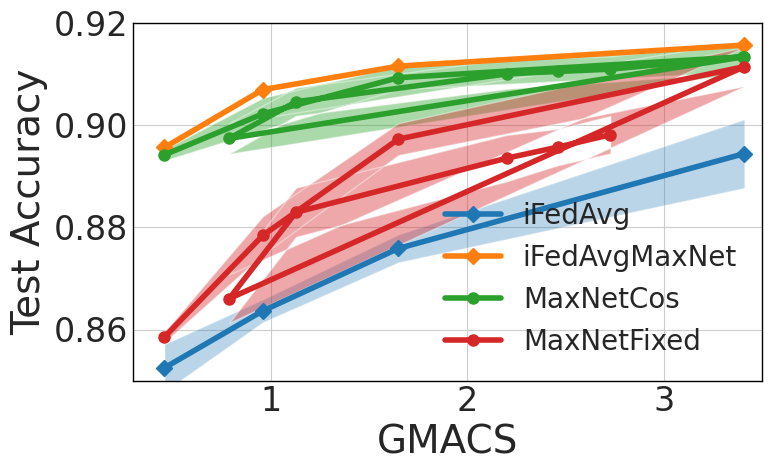

In [375]:
ax_fill_list = [["iFedAvg", 0.3],
                ["iFedAvgMaxNet", 0.3],
                ["MaxNetCos", 0.4],
                ["MaxNetFixed", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.85, 0.92, 1500, "explanability_cifar10_alph100.pdf", markers=['D', 'D', 'o', 'o'])

In [376]:
fed_pareto, error_fed_pareto = fed_paretos(["flofa/cifar10-cleaned/1dl2fxi9", "flofa/cifar10-cleaned/1wh978r3", "flofa/cifar10-cleaned/nt133vae"],
                                           ["flofa/cifar10-cleaned/w2sqaon2", "flofa/cifar10-cleaned/1zpyz46a", "flofa/cifar10-cleaned/sep9wu4x"],
                                           ["flofa/cifar10-cleaned/3hh2dhn3", "flofa/cifar10-cleaned/1ayzkmjw", "flofa/cifar10-cleaned/3kwfm379"],
                                           ["flofa/cifar10-cleaned/1956egfp", "flofa/cifar10-cleaned/3bafwyp3", "flofa/cifar10-cleaned/ftc7rokb"],
                                           uptil_r=1500)
name_modifier = {"MaxNetCosB=0.9":"./MultiSeedCSVs/alph100_cifar10_maxnetcos.csv",
                "MaxNetFixedB=0.9":"./MultiSeedCSVs/alph100_cifar10_maxnetfixed.csv"}
ws_pareto, error_ws_pareto = ws_paretos([["flofa/cifar10-cleaned/3vn2tjv1", "flofa/cifar10-cleaned/1y1tkuw3", "flofa/cifar10-cleaned/1pqzuk1l"],
                                        ["flofa/cifar10-cleaned/2szgylog", "flofa/cifar10-cleaned/1yvmo9qk", "flofa/cifar10-cleaned/1mrchviw"]], 1500, ["MaxNetCosB=0.9", "MaxNetFixedB=0.9"], modify_names=name_modifier)

fed pareto generation running...


/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_accs.append(cur_best_acc[0])
/tmp/ipykernel_2235306/782516193.py:11: FutureWarning: Series.__getitem__ tr

MaxNetCosB=0.9 pareto generation running...
MaxNetFixedB=0.9 pareto generation running...


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

           iFedAvg  MaxNetCosB=0.9  MaxNetFixedB=0.9
0.460000  0.852497        0.894197          0.858540
0.960000  0.863649        0.902210          0.878405
1.650000  0.875868        0.909288          0.897269
3.410000  0.894431        0.913395          0.911458
0.789271       NaN        0.897403          0.866052
1.129009       NaN        0.904581          0.882946
2.200130       NaN        0.910023          0.893530
2.464371       NaN        0.910524          0.895733
2.728612       NaN        0.910958          0.898137
3.403370       NaN        0.913395               NaN


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

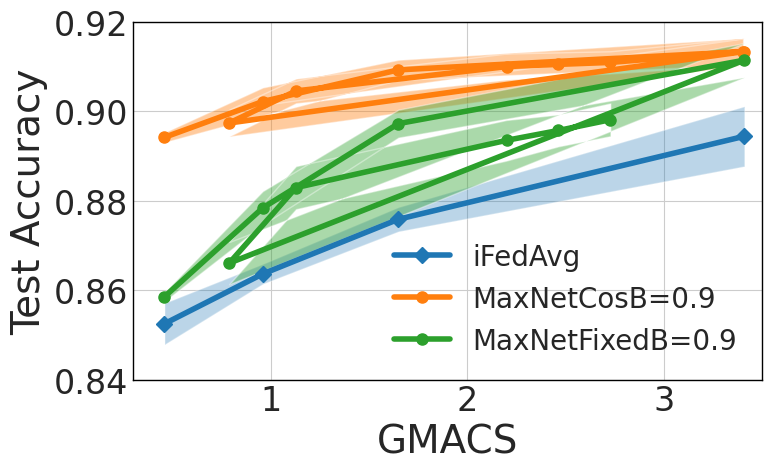

In [377]:
ax_fill_list = [["iFedAvg", 0.3],
                ["MaxNetCosB=0.9", 0.4],
                ["MaxNetFixedB=0.9", 0.4]]
adv_plot(fed_pareto, error_fed_pareto, ws_pareto, error_ws_pareto, ax_fill_list, 0.84, 0.92, 1500, "appendix_explanability_cifar10_alph100.pdf", markers=['D', 'o', 'o'])

# Cost calculations (CIFAR10)

In [378]:
import wandb
superfed_dry_run = wandb.Api().run("flofa/cifar10-cleaned/1v8nkwq5")
psfl_dry_run = wandb.Api().run("flofa/cifar10-cleaned/82s4novf")
random_dry_run = wandb.Api().run("flofa/cifar10-cleaned/2agyowsi")

In [379]:
print(superfed_dry_run.name)
print(psfl_dry_run.name)
print(random_dry_run.name)

DRYRUN-alph=100-maxnetcos
DRYRUN-alph=100-PSw/KD-fedavg_init
DRYRUN-alph=100-random


In [380]:
ws_dryruns = {"superfed": superfed_dry_run, "psfl": psfl_dry_run, "random": random_dry_run}

In [381]:
tot_param_dict = {key: 0 for key in ws_dryruns}
tot_macs_dict = {key: 0 for key in ws_dryruns}
for ws_name, dry_run in ws_dryruns.items():
    print(ws_name)
    for i, row in dry_run.history(samples=10000).iterrows():
        if i >= 1500: break
        for i in range(8):
            tot_param_dict[ws_name] += row[f"Parameters/idx:{i}"]
            tot_macs_dict[ws_name] += row[f"GFLOPS/idx:{i}"]
tot_macs_dict["psflfirst"] = 0
tot_macs_dict["psflsecond"] = 0
for i, row in psfl_dry_run.history(samples=10000).iterrows():
    if i < 750:
        for i in range(8):
            tot_macs_dict["psflfirst"] += row[f"GFLOPS/idx:{i}"]
    else:
        for i in range(8):
            tot_macs_dict["psflsecond"] += row[f"GFLOPS/idx:{i}"]
print(tot_param_dict)
print(tot_macs_dict)
print(tot_macs_dict["psflfirst"], tot_macs_dict["psflfirst"]/(8*750))
print(tot_macs_dict["psflsecond"], tot_macs_dict["psflsecond"]/(8*750))

superfed
psfl
random
{'superfed': 427172305504.0, 'psfl': 477236559296.0, 'random': 406352978288.0}
{'superfed': 20117.82198067163, 'psfl': 22776.165826560093, 'random': 19157.833875456254, 'psflfirst': 13085.492576255963, 'psflsecond': 9701.611634688003}
13085.492576255963 2.180915429375994
9701.611634688003 1.6169352724480004


In [382]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from ofa.utils import flops_counter as fp
from fedml_api.standalone.flofa.elastic_nn.ofa_resnets_32x32_10_26 import (
     OFAResNets32x32_10_26,
     ResNets32x32_10_26,
 )
supernet = OFAResNets32x32_10_26()
supernet.set_active_subnet(**{"d":[0,0,0,0], "e": 0.1})
test_subnet = supernet.get_active_subnet()
supernet2 = OFAMobileNetV3_32x32()


In [383]:
def calc_costs(subnet_arch):
    supernet.set_active_subnet(**subnet_arch)
    cur_subnet = supernet.get_active_subnet()
    flops, _ = fp.profile(cur_subnet, (1,3,32, 32))
    gflops = flops / 10e8
    params = sum(p.numel() for p in cur_subnet.parameters() if p.requires_grad)
    total_gflops = gflops*8
    total_params = params*8*4/1e9
    return [total_gflops*1500, total_params*1500]
print("MaxNet SuperFed Costs:", tot_macs_dict["superfed"], tot_param_dict["superfed"])
fedavg_runs_cost = dict()
fedavg_runs_cost["largest"] = calc_costs({"d":[2,2,2,2], "e": 0.25})
fedavg_runs_cost["middle2"] = calc_costs({"d":[1,1,1,1], "e": 0.18})
fedavg_runs_cost["middle1"] = calc_costs({"d":[0,1,0,1], "e": 0.14})
fedavg_runs_cost["smallest"] = calc_costs({"d":[0,0,0,0], "e": 0.1})
total_fedavg_cost = [0,0]
for subnet in fedavg_runs_cost.keys():
    total_fedavg_cost[0] += fedavg_runs_cost[subnet][0]
    total_fedavg_cost[1] += fedavg_runs_cost[subnet][1]
print("Largest: ", fedavg_runs_cost["largest"][0], calc_costs({"d":[2,2,2,2], "e": 0.25})[1])
print("Middle2: ", calc_costs({"d":[1,1,1,1], "e": 0.18})[1])
print("Middle1: ", calc_costs({"d":[0,1,0,1], "e": 0.14})[1])
print("Smallest: ", calc_costs({"d":[0,0,0,0], "e": 0.1})[1])
print("Total Fedavg(4) Costs: ", total_fedavg_cost)
arch = {"d":[0,0,0,1], "e": 0.14}
fedavg_runs_cost[f"{arch}"] = calc_costs(arch)
print(arch, fedavg_runs_cost[f"{arch}"][1])
arch = {"d":[0,1,1,1], "e": 0.14}
fedavg_runs_cost[f"{arch}"] = calc_costs(arch)
print(arch, fedavg_runs_cost[f"{arch}"][1])
arch = {"d":[1,1,1,2], "e": 0.22}
fedavg_runs_cost[f"{arch}"] = calc_costs(arch)
print(arch, fedavg_runs_cost[f"{arch}"][1])
arch = {"d":[1,2,1,2], "e": 0.22}
fedavg_runs_cost[f"{arch}"] = calc_costs(arch)
print(arch, fedavg_runs_cost[f"{arch}"][1])
arch = {"d":[1,2,2,2], "e": 0.22}
fedavg_runs_cost[f"{arch}"] = calc_costs(arch)
print(arch, fedavg_runs_cost[f"{arch}"][1])
total_fedavg_cost_9 = [0,0]
for subnet in fedavg_runs_cost.keys():
    total_fedavg_cost_9[0] += fedavg_runs_cost[subnet][0]
    total_fedavg_cost_9[1] += fedavg_runs_cost[subnet][1]
print("Total Fedavg(9) Costs: ", total_fedavg_cost_9)

MaxNet SuperFed Costs: 20117.82198067163 427172305504.0
Largest:  40864.776192 3540.2423040000003
Middle2:  1748.582784
Middle1:  1281.051264
Smallest:  596.412288
Total Fedavg(4) Costs:  [77675.10220800001, 7166.288640000001]
{'d': [0, 0, 0, 1], 'e': 0.14} 1249.144704
{'d': [0, 1, 1, 1], 'e': 0.14} 1408.565376
{'d': [1, 1, 1, 2], 'e': 0.22} 2866.4928
{'d': [1, 2, 1, 2], 'e': 0.22} 2916.09792
{'d': [1, 2, 2, 2], 'e': 0.22} 3114.398592
Total Fedavg(9) Costs:  [189533.45433600002, 18720.988032]


In [384]:
import torch
supernet.set_active_subnet(**{"d":[2,2,2,2], "e": 0.25})
cur_subnet = supernet.get_active_subnet()
torch.save(cur_subnet, "test2.pt")

In [385]:
subnet_archs = [{"d":[2,2,2,2], "e": 0.25}, {"d":[0,0,0,0], "e": 0.1}]
for arch in subnet_archs:
    supernet.set_active_subnet(**arch)
    cur_subnet = supernet.get_active_subnet()
    flops, _ = fp.profile(cur_subnet, (1,3,32, 32))
    gflops = flops / 10e8
    params = sum(p.numel() for p in cur_subnet.parameters() if p.requires_grad) /1e9
    total_gflops = gflops*8
    total_params = params*8*4
    print(arch, total_gflops, total_params, gflops, params)

{'d': [2, 2, 2, 2], 'e': 0.25} 27.243184128 2.360161536 3.405398016 0.073755048
{'d': [0, 0, 0, 0], 'e': 0.1} 3.687972864 0.397608192 0.460996608 0.012425256


In [386]:
module_path = os.path.abspath(os.path.join('../fedml_api/standalone/flofa/elastic_nn/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from darts import genotypes
from darts.model import NetworkCIFAR
genotype = genotypes.FedNAS_V1
print(genotype)
model = NetworkCIFAR(38, 10, 2, False, genotype)


Genotype(normal=[('sep_conv_3x3', 1), ('sep_conv_3x3', 0), ('sep_conv_3x3', 2), ('sep_conv_5x5', 0), ('sep_conv_3x3', 1), ('sep_conv_5x5', 3), ('dil_conv_5x5', 3), ('sep_conv_3x3', 4)], normal_concat=range(2, 6), reduce=[('max_pool_3x3', 0), ('skip_connect', 1), ('max_pool_3x3', 0), ('max_pool_3x3', 2), ('max_pool_3x3', 0), ('dil_conv_5x5', 1), ('max_pool_3x3', 0), ('dil_conv_5x5', 2)], reduce_concat=range(2, 6))
114 114 76
114 304 152


In [387]:
from fvcore.nn import FlopCountAnalysis
import torch

def calc_costs(model):
    model.train()
    tensor = torch.zeros((64, 3, 32, 32), device="cuda:1")
    model.to("cuda:1")
    flops = FlopCountAnalysis(model, (tensor))
    flops = flops.total()
    gflops = flops / 10e8
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_gflops = gflops*8
    total_params = params*8*4/1e9
    return [total_gflops*1500, total_params*1500]
fednas_runs_cost = dict()
fednas_runs_cost["largest"] = calc_costs(NetworkCIFAR(24, 10, 4, False, genotype))
torch.save(NetworkCIFAR(24, 10, 4, False, genotype), "test.pt")
fednas_runs_cost["middle"] = calc_costs(NetworkCIFAR(16, 10, 4, False, genotype))
fednas_runs_cost["smallest"] = calc_costs(NetworkCIFAR(16, 10, 2, False, genotype))
total_fednas_cost = [0,0]
for subnet in fednas_runs_cost.keys():
    total_fednas_cost[0] += fednas_runs_cost[subnet][0]
    total_fednas_cost[1] += fednas_runs_cost[subnet][1]
print(fednas_runs_cost)
print("Total FedNAS(3) Costs: ", total_fednas_cost)

72 72 24
72 96 48
96 192 96
192 384 96


Unsupported operator aten::add_ encountered 45 time(s)
Unsupported operator aten::bernoulli_ encountered 32 time(s)
Unsupported operator aten::div_ encountered 32 time(s)
Unsupported operator aten::mul_ encountered 32 time(s)
Unsupported operator aten::add encountered 16 time(s)
Unsupported operator aten::max_pool2d encountered 10 time(s)


72 72 24
72 96 48
96 192 96
192 384 96
48 48 16
48 64 32
64 128 64
128 256 64


Unsupported operator aten::add_ encountered 45 time(s)
Unsupported operator aten::bernoulli_ encountered 32 time(s)
Unsupported operator aten::div_ encountered 32 time(s)
Unsupported operator aten::mul_ encountered 32 time(s)
Unsupported operator aten::add encountered 16 time(s)
Unsupported operator aten::max_pool2d encountered 10 time(s)
Unsupported operator aten::add_ encountered 11 time(s)
Unsupported operator aten::max_pool2d encountered 10 time(s)
Unsupported operator aten::bernoulli_ encountered 16 time(s)
Unsupported operator aten::div_ encountered 16 time(s)
Unsupported operator aten::mul_ encountered 16 time(s)
Unsupported operator aten::add encountered 8 time(s)


48 48 32
48 128 64
{'largest': [43918.884864, 15.377375999999998], 'middle': [21830.172672, 7.308768], 'smallest': [8051.884032, 1.892064]}
Total FedNAS(3) Costs:  [73800.94156800001, 24.578208]


In [388]:
for p in test_subnet.parameters():
    if p.requires_grad:
        print(type(p.data), p.data.dtype)
        break

<class 'torch.Tensor'> torch.float32



|                     | Avg Runtime Per Client Per Round (GFlops) | Avg Comm Cost Per Round (GB) |
|---------------------|-------------------------------------------|------------------------------|
| SuperFed            | 0.67                                      | 2.28                         |
| FedAvg Largest      | 1.36                                      | 4.72                         |
| iFedAvg(4)          | 2.59                                      | 9.56                         |
| iFedAvg(9)          | 6.32                                      | 24.96                        |
| PS+FL               | 0.76                                      | 2.54                         |


In [389]:
import matplotlib.ticker as mticker
class AdditionalTickLocator(mticker.Locator):
    '''This locator chains whatever locator given to it, and then add addition custom ticks to the result'''
    def __init__(self, chain: mticker.Locator, ticks) -> None:
        super().__init__()
        assert chain is not None
        self._chain = chain
        self._additional_ticks = np.asarray(list(ticks))

    def _add_locs(self, locs):
        locs = np.unique(np.concatenate([
            np.asarray(locs),
            self._additional_ticks
        ]))
        return locs

    def tick_values(self, vmin, vmax):
        locs = self._chain.tick_values(vmin, vmax)
        return self._add_locs(locs)

    def __call__(self):
        # this will call into chain's own tick_values,
        # so we also add ours here
        locs = self._chain.__call__()
        return self._add_locs(locs)

    def nonsingular(self, v0, v1):
        return self._chain.nonsingular(v0, v1)
    def set_params(self, **kwargs):
        return self._chain.set_params(**kwargs)
    def view_limits(self, vmin, vmax):
        return self._chain.view_limits(vmin, vmax)


class AdditionalTickFormatter(mticker.Formatter):
    '''This formatter chains whatever formatter given to it, and
    then does special formatting for those passed in custom ticks'''
    def __init__(self, chain: mticker.Formatter, ticks) -> None:
        super().__init__()
        assert chain is not None
        self._chain = chain
        self._additional_ticks = ticks

    def __call__(self, x, pos=None):
        if x in self._additional_ticks:
            return self._additional_ticks[x]
        res = self._chain.__call__(x, pos)
        return res

    def format_data_short(self, value):
        if value in self._additional_ticks:
            return self.__call__(value)
        return self._chain.format_data_short(value)

    def get_offset(self):
        return self._chain.get_offset()
    
    def _set_locator(self, locator):
        self._chain._set_locator(locator)

    def set_locs(self, locs):
        self._chain.set_locs(locs)

In [390]:
def axis_add_custom_ticks(axis, ticks):
    locator = axis.get_major_locator()
    formatter = axis.get_major_formatter()
    axis.set_major_locator(AdditionalTickLocator(locator, ticks.keys()))
    axis.set_major_formatter(AdditionalTickFormatter(formatter, ticks))

/tmp/ipykernel_2235306/2794858574.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-whitegrid")
/tmp/ipykernel_2235306/2794858574.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_2235306/2794858574.py:92: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(index[-1], superfed_gflop_data[-1]), xytext=(index[-1], fedpnas_gflop_data[-1]-45),
/tmp/ipykernel_2235306/2794858574.py:96: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(index[-1]+0.5, superfed_gflop_data[-1]), xytext=(index[-1]+0.5, fednas_gflop_data[-1]-35),


[120.776933376, 142.919614464, 202.95258931200001, 503.11746355200006, 743.249362944, 983.3812623360001, 1223.5131617280001] 
 [100.58910990335815, 100.58910990335815, 100.58910990335815, 100.58910990335815, 100.58910990335815, 100.58910990335815, 100.58910990335815] 
 [30.5, 45.75, 91.5, 205.875, 274.5, 366.0, 457.5]


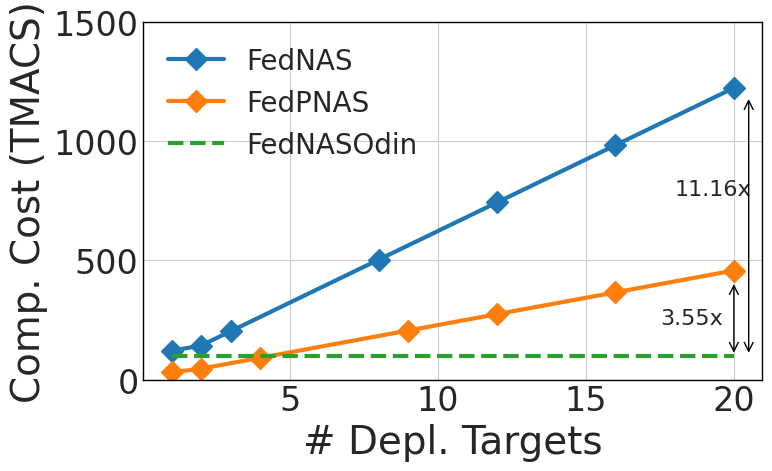

In [428]:
# Plot gflop cost graph
matplotlib.style.use("seaborn-whitegrid")
'''fedavg_gflop_data=[fedavg_runs_cost["largest"][0], 
                        fedavg_runs_cost["largest"][0]+fedavg_runs_cost["smallest"][0],
                        total_fedavg_cost[0],
                        total_fedavg_cost_9[0]]'''
index=[1,2,4,9,12,16,20]
#fedavg_gflop_cost = pd.Series(data=fedavg_gflop_data, index=index, name="iFedavg")

fednas_gflop_data=[fednas_runs_cost["largest"][0], 
                        fednas_runs_cost["largest"][0]+fednas_runs_cost["smallest"][0],
                        total_fednas_cost[0],
                        total_fednas_cost[0]+5*fednas_runs_cost["middle"][0],
                        total_fednas_cost[0]+9*fednas_runs_cost["middle"][0],
                        total_fednas_cost[0]+13*fednas_runs_cost["middle"][0],
                        total_fednas_cost[0]+17*fednas_runs_cost["middle"][0]]
for i in range(len(fednas_gflop_data)):
    # 5 local epochs + 10% search cost
    fednas_gflop_data[i] *= 5*1.1
    #to TFLOPS
    fednas_gflop_data[i] /= 1e3
    #to TMACS
    fednas_gflop_data[i] /= 2
#Min Time to compute in seconds
#fednas_gflop_data[i] /= TFLOPpsec
#Convert to hours
#fednas_gflop_data[i] /= 3600
index_fednas=[1,2,3,8,12,16,20]
fednas_gflop_cost = pd.Series(data=fednas_gflop_data, index=index_fednas, name="FedNAS")

fedpnas_smallest, fedpnas_largest = 6100, 12200
fedpnas_smallest *= 5
fedpnas_largest *= 5
fedpnas_smallest /= (2*1e3)
fedpnas_largest /= (2*1e3)
fedpnas_middle = (fedpnas_smallest+fedpnas_largest)/2
fedpnas_gflop_data = [fedpnas_largest,
                    fedpnas_smallest+fedpnas_largest,
                    fedpnas_smallest+fedpnas_largest+fedpnas_middle*2,
                    fedpnas_smallest+fedpnas_largest+fedpnas_middle*7,
                    fedpnas_smallest+fedpnas_largest+fedpnas_middle*10,
                    fedpnas_smallest+fedpnas_largest+fedpnas_middle*14,
                    fedpnas_smallest+fedpnas_largest+fedpnas_middle*18]
fedpnas_gflop_cost = pd.Series(data=fedpnas_gflop_data, index=index, name="FedPNAS")


superfed_gflop_data = [tot_macs_dict["superfed"]*5/1e3 for _ in range(len(index))]
superfed_gflop_cost = pd.Series(data=superfed_gflop_data, index=index, name="FedNASOdin")

print(fednas_gflop_data, "\n", superfed_gflop_data, "\n", fedpnas_gflop_data)

#print(fedavg_gflop_cost)
#print(fednas_gflop_cost)
#print(superfed_gflop_cost)

ax = None
#ax = fedavg_gflop_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def)
ax = fednas_gflop_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def+3)
ax = fedpnas_gflop_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def+3)

ax = superfed_gflop_cost.plot.line(style=['--'], ax=ax, linewidth=3)

#for i in range(len(index)):
#    ax.annotate("{:.2f}".format(fedavg_gflop_data[i]), xy=(index[i]-0.4, fedavg_gflop_data[i]+0.4), fontsize=16)   
plt.draw()
labels = [w.get_text() for w in ax.get_yticklabels()]
locs=list(ax.get_yticks())
#labels+=["{:.2f}".format(superfed_gflop_data[0])]
#locs+=[superfed_gflop_data[0]]
plt.draw()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
ax.set_yticklabels(labels)
ax.set_yticks(locs)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    
fedpnas_improvement_factor = (fedpnas_gflop_data[-1]-superfed_gflop_data[-1]) / superfed_gflop_data[-1]

fednas_improvement_factor = (fednas_gflop_data[-1]-superfed_gflop_data[-1]) / superfed_gflop_data[-1]
# Annotate the plot for fepnas factor improvement
plt.annotate(f'{fedpnas_improvement_factor:.2f}x',
             xy=(index[-1]-2.5, fedpnas_gflop_data[-1]-225),
             xytext=(index[-1]-2.5, fedpnas_gflop_data[-1]-225))\

# Annotate the plot for fenas factor improvement
plt.annotate(f'{fednas_improvement_factor:.2f}x',
             xy=(index[-1]-2, fednas_gflop_data[-1]-450),
             xytext=(index[-1]-2, fednas_gflop_data[-1]-450))

# Draw a two-sided arrow comparing superfed with fedpnas
plt.annotate('', xy=(index[-1], superfed_gflop_data[-1]), xytext=(index[-1], fedpnas_gflop_data[-1]-45),
             arrowprops=dict(facecolor='black', arrowstyle='<->', color='black'))

# Draw a two-sided arrow comparing superfed with fednas
plt.annotate('', xy=(index[-1]+0.5, superfed_gflop_data[-1]), xytext=(index[-1]+0.5, fednas_gflop_data[-1]-35),
             arrowprops=dict(facecolor='black', arrowstyle='<->', color='black'))

plt.xlabel("# Depl. Targets")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
plt.ylim(bottom=0) # have uniform y-axis accross all plots
plt.ylabel("Comp. Cost (TMACS)")
plt.tight_layout()
plt.legend(loc="upper left", prop={'size':def_font_size})
plt.savefig("Comp_Cost_Graph.pdf")

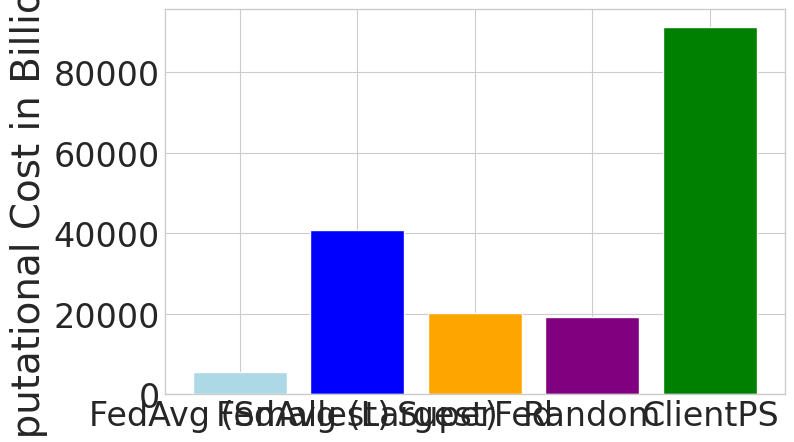

{'superfed': 20117.82198067163, 'psfl': 22776.165826560093, 'random': 19157.833875456254, 'psflfirst': 13085.492576255963, 'psflsecond': 9701.611634688003}


<Figure size 800x500 with 0 Axes>

In [266]:
first_avg_net = tot_macs_dict["psflfirst"]/(8*750)
second_avg_net = tot_macs_dict["psflsecond"]/(8*750)
first_half_cost_est = first_avg_net*4*8*750
second_half_cost_est = second_avg_net*4*8*750

plt.bar(x=["FedAvg (Smallest)", "FedAvg (Largest)", "SuperFed", "Random", "ClientPS"], 
        height=[fedavg_runs_cost["smallest"][0], 
                fedavg_runs_cost["largest"][0], 
                tot_macs_dict["superfed"], 
                tot_macs_dict["random"], 
                ((tot_macs_dict["psflfirst"]+tot_macs_dict["psflsecond"])*4),],
       color = ["lightblue", "blue", "orange", "purple", "green"])
plt.ylabel('Total Computational Cost in Billions of MACs')
#plt.xticks(fontsize=8)
#plt.yticks(fontsize=12)
plt.show()
plt.savefig("MAC_Cost_Graph_Sec3.pdf")
print(tot_macs_dict)

/tmp/ipykernel_2235306/938899654.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-whitegrid")
/tmp/ipykernel_2235306/938899654.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels2)


1708.689222016
1            23.066064
10          113.609376
100        1100.293056
1000      10967.129856
10000    109635.497856
Name: FedNAS, dtype: float64


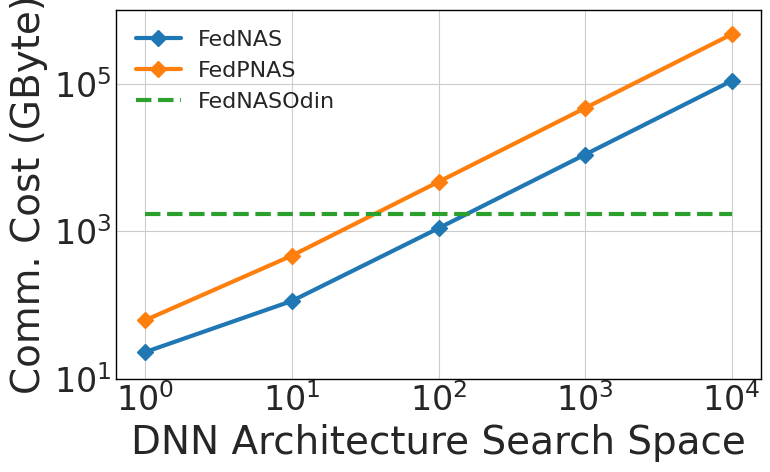

In [304]:
# Plot communication cost (parameters) graph
matplotlib.style.use("seaborn-whitegrid")
fedavg_comm_data = [ fedavg_runs_cost["largest"][1], 
                    fedavg_runs_cost["largest"][1]+fedavg_runs_cost["smallest"][1],
                    total_fedavg_cost[1],
                    total_fedavg_cost_9[1]]
fedavg_comm_cost = pd.Series(data=fedavg_comm_data, index=index, name="iFedavg")
index_fednas = [1, 10, 100, 1000, 10000]
fednas_comm_data = [fednas_runs_cost["largest"][1], 
                    total_fednas_cost[1]+7*fednas_runs_cost["middle"][1],
                    total_fednas_cost[1]+97*fednas_runs_cost["middle"][1],
                    total_fednas_cost[1]+997*fednas_runs_cost["middle"][1],
                    total_fednas_cost[1]+9997*fednas_runs_cost["middle"][1]]
for i in range(len(fednas_comm_data)):
    #additional data being communicated during search phase
    fednas_comm_data[i] *= 1.5
fednas_comm_cost = pd.Series(data=fednas_comm_data, index=index_fednas, name="FedNAS")

fedpnas_smallest, fedpnas_largest = 31.211136, 62.422272
fedpnas_middle = (fedpnas_smallest+fedpnas_largest)/2
fedpnas_comm_data = [fedpnas_largest,
                    fedpnas_middle*10,
                    fedpnas_middle*100,
                    fedpnas_middle*1000,
                    fedpnas_middle*10000]
fedpnas_comm_cost = pd.Series(data=fedpnas_comm_data, index=index_fednas, name="FedPNAS")


comm_cost_superfed = (tot_param_dict["superfed"]*4)/1e9
comm_cost_random = (tot_param_dict["random"]*4)/1e9
superfed_comm_data = [comm_cost_superfed for _ in range(len(index_fednas))]



superfed_comm_cost = pd.Series(data=superfed_comm_data, index=index_fednas, name="FedNASOdin")

print(comm_cost_superfed)
print(fednas_comm_cost)

ax = None
#ax = fedavg_comm_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def)
ax = fednas_comm_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def)
ax = fedpnas_comm_cost.plot.line(marker='D', ax=ax, linewidth=3, markersize=markersize_def)

ax = superfed_comm_cost.plot.line(style=['--'], ax=ax, linewidth=3)

x_indices = [0.3, 0.3, 0.5, 1.4]
y_indices = [1.4,1.4,1.4,0]
#for i in range(len(index)):
#    ax.annotate("{:.2f}".format(fedavg_comm_data[i]), xy=(index[i]-x_indices[i], fedavg_comm_data[i]+y_indices[i]), fontsize=16)
#ax.annotate("{:.2f}".format(superfed_comm_data[0]), xy=(0.7, superfed_comm_data[0]+0.3), fontsize=12)
#plt.draw()
labels2 = [w.get_text() for w in ax.get_yticklabels()]
locs2=list(ax.get_yticks())
#abels2+=["{:.2f}".format(superfed_comm_data[0])]
#ocs2+=[superfed_comm_data[0]]
plt.draw()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.ylim(bottom=0)
ax.set_yticklabels(labels2)
ax.set_yticks(locs2)
ax.set_ylim([10, 1000000])
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("DNN Architecture Search Space")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,27) # have uniform y-axis accross all plots
plt.ylabel("Comm. Cost (GByte)")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig("Comm_Cost_Graph.pdf")

3540.2423040000003 596.412288


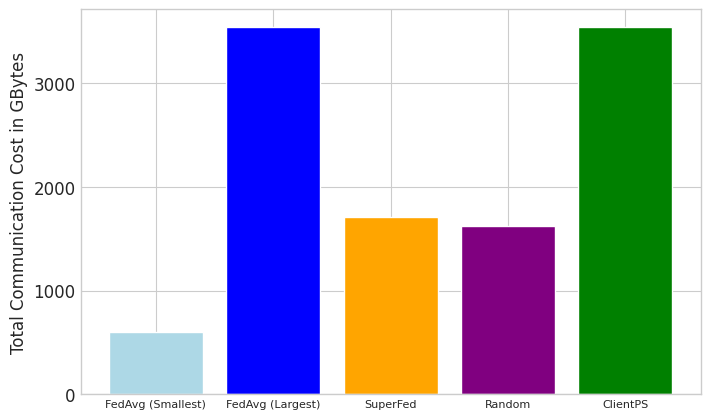

In [269]:
print(fedavg_runs_cost["largest"][1], fedavg_runs_cost["smallest"][1])
plt.bar(x=["FedAvg (Smallest)", "FedAvg (Largest)", "SuperFed", "Random", "ClientPS"], 
        height=[fedavg_runs_cost["smallest"][1], fedavg_runs_cost["largest"][1], comm_cost_superfed, comm_cost_random, fedavg_runs_cost["largest"][1]],
       color = ["lightblue", "blue", "orange", "purple", "green"])
plt.ylabel('Total Communication Cost in GBytes', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)
plt.show()

In [270]:
clientPS_run = wandb.Api().run("flofa/cifar10-cleaned/13fokmr4")
superfed_run = wandb.Api().run("flofa/cifar10-cleaned/3vn2tjv1")
fedavg_largest_run = wandb.Api().run("flofa/cifar10-cleaned/1956egfp")
fedavg_smallest_run = wandb.Api().run("flofa/cifar10-cleaned/1dl2fxi9")
fedavg_largest_run_0_1 = wandb.Api().run("flofa/cifar10-cleaned/15c4lbau")
fedavg_smallest_run_0_1 = wandb.Api().run("flofa/cifar10-cleaned/27j50twd")
random_run = wandb.Api().run("flofa/cifar10-cleaned/wvbq5byq")
superfed_run_0_1 = wandb.Api().run("flofa/cifar10-cleaned/nk52joxt")
clientPS_run_0_1 = wandb.Api().run("flofa/cifar10-cleaned/3s066sot")
random_run_alpha_0_1 = wandb.Api().run("flofa/cifar10-cleaned/1dj55jyl")

In [271]:
rounds = []
clientPS_avg_accs = []
superfed_avg_accs = []
fedavg_avg_accs = []
random_avg_accs = []
print("Client PS")
for i, row in clientPS_run.history(samples=1500).iterrows():
    print(row["round"])
    rounds.append(row["round"])
    clientPS_avg_accs.append((row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]+row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])*50)
    #clientPS_avg_accs.append((row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
print(clientPS_avg_accs)
print("SuperFed")
for i, row in superfed_run.history(samples=1500).iterrows():
    print(row["round"])
    superfed_avg_accs.append((row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]+row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])*50)
    #superfed_avg_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
print(superfed_avg_accs)
print("Random")
for i, row in random_run.history(samples=1500).iterrows():
    print(row["round"])
    random_avg_accs.append((row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]+row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])*50)
    #random_avg_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
print(random_avg_accs)
print("FedAvg Largest")
for i, row in fedavg_largest_run.history(samples=1500).iterrows():
    print(i, row["round"])
    fedavg_avg_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
print(fedavg_avg_accs)
print("FedAvg Smallest")
for i, row in fedavg_smallest_run.history(samples=1500).iterrows():
    if i > 30: break
    print(i, row["round"])
    fedavg_avg_accs[i] += (row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])
    fedavg_avg_accs[i] *= 50
print(fedavg_avg_accs)

Client PS
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
[19.080000000000002, 44.14, 49.52, 52.595000000000006, 53.07000000000001, 52.635, 52.825, 52.900000000000006, 53.39, 53.505, 52.31, 52.685, 52.52, 53.035, 53.7, 75.205, 83.865, 84.49, 84.66, 84.83500000000001, 85.085, 85.00999999999999, 85.13, 85.205, 85.33999999999999, 85.305, 85.485, 85.37, 85.46000000000001, 85.44, 85.49]
SuperFed
0.0
50.0
100.0
150.0
200.0
250.0
300.0
350.0
400.0
450.0
500.0
550.0
600.0
650.0
700.0
750.0
800.0
850.0
900.0
950.0
1000.0
1050.0
1100.0
1150.0
1200.0
1250.0
1300.0
1350.0
1400.0
1450.0
1500.0
[14.362980769230768, 45.73317307692307, 58.458533653846146, 66.99719551282051, 73.53766025641026, 77.35376602564102, 80.47375801282051, 83.2431891025641, 83.95432692307692, 86.38822115384615, 87.12439903846155, 88.27123397435898, 88.71694711538461, 89.01241987179486, 89.4931891025641, 89.70853365384615, 89.74358974358975, 89.8

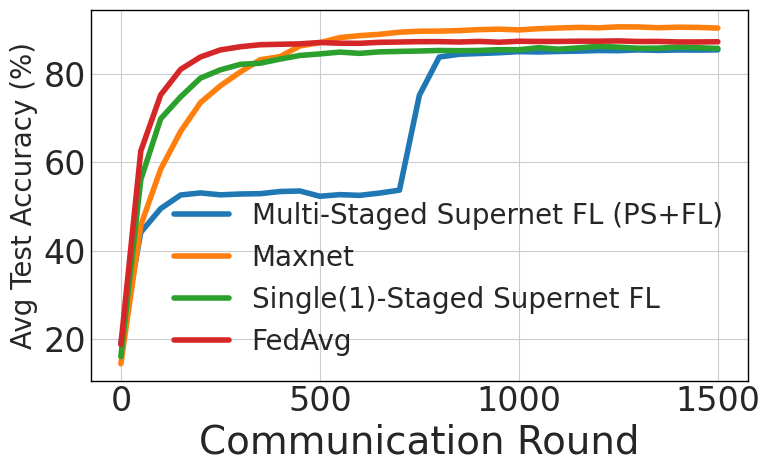

In [297]:
clientps_data = pd.Series(data=clientPS_avg_accs[:31], index=rounds[:31], name="Multi-Staged Supernet FL (PS+FL)") 
superfed_data = pd.Series(data=superfed_avg_accs[:31], index=rounds[:31], name="Maxnet")
random_data = pd.Series(data=random_avg_accs[:31], index=rounds[:31], name="Single(1)-Staged Supernet FL")
fedavg_data = pd.Series(data=fedavg_avg_accs[:31], index=rounds[:31], name="FedAvg")
ax = None
ax = clientps_data.plot.line(ax=ax)
ax = superfed_data.plot.line(ax=ax)
ax = random_data.plot.line(ax=ax)
ax = fedavg_data.plot.line(ax=ax)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Avg Test Accuracy (%)", fontsize=def_font_size)
plt.tight_layout()
plt.legend(loc="best", prop={'size':def_font_size})
plt.savefig("Convergence_Comparison_Sec3.pdf")

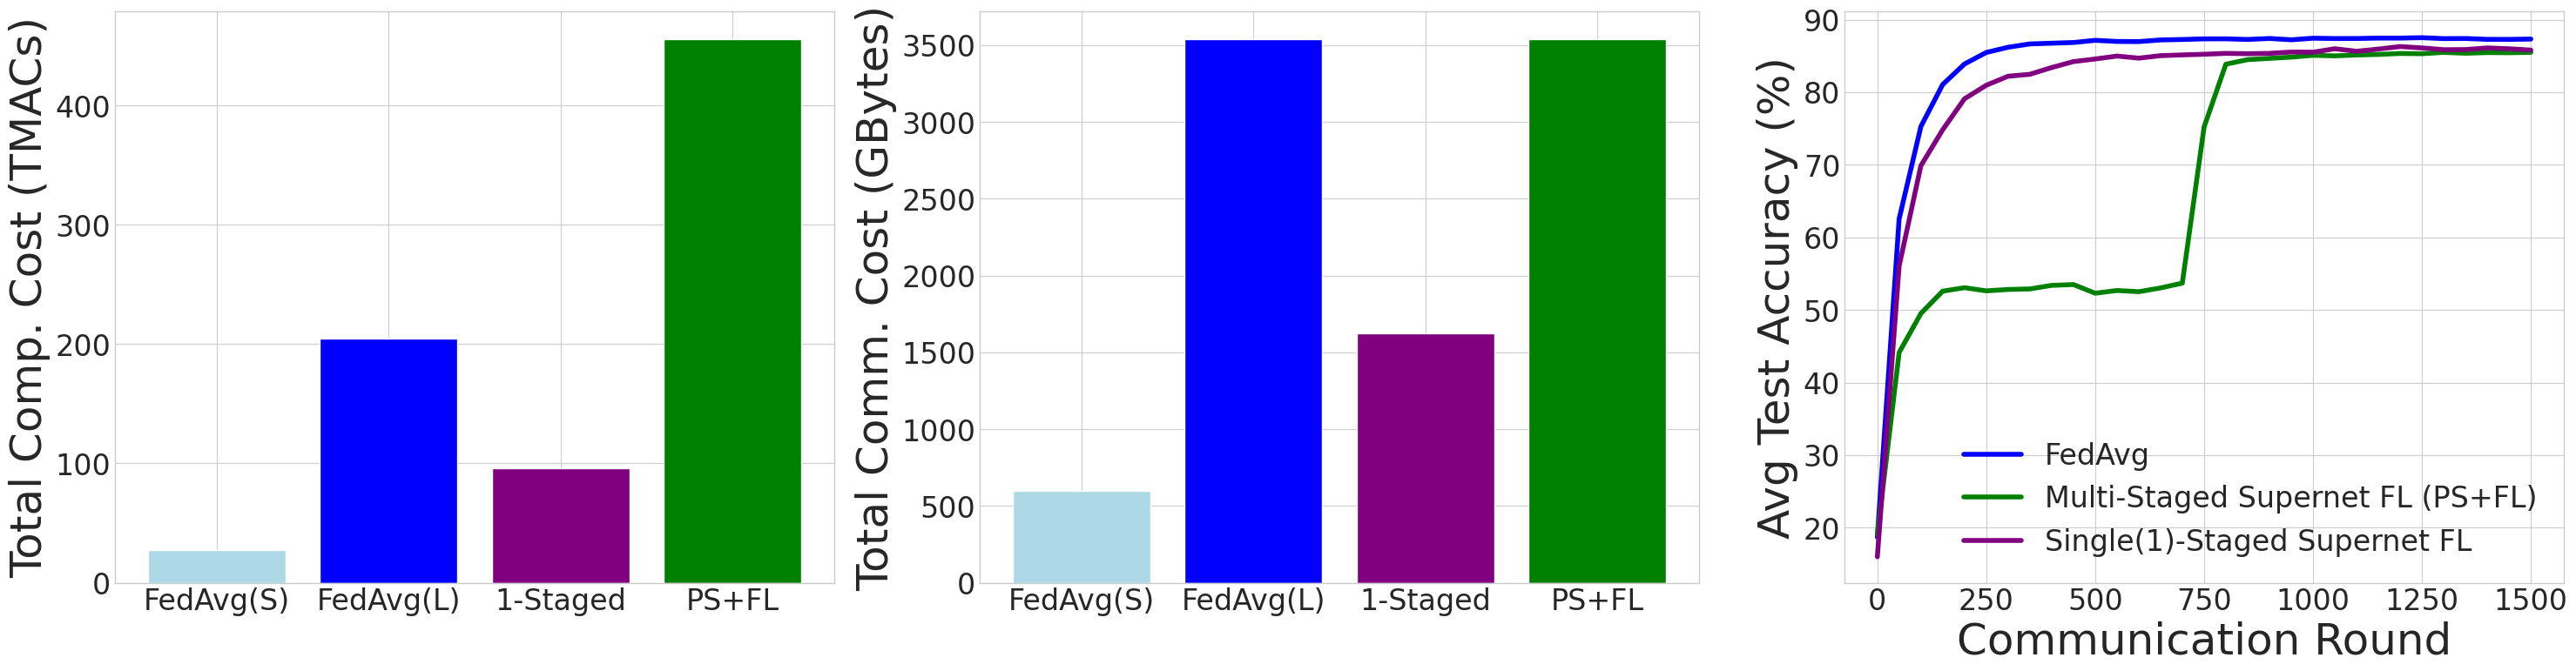

In [303]:
# Create a figure and three subplots (horizontally stacked)
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
axs[0].bar(x=["FedAvg(S)", "FedAvg(L)", "1-Staged", "PS+FL"], 
        height=[fedavg_runs_cost["smallest"][0]*5/1e3, fedavg_runs_cost["largest"][0]*5/1e3, tot_macs_dict["random"]*5/1e3, ((tot_macs_dict["psflfirst"]+tot_macs_dict["psflsecond"])*4*5/1e3)],
       color = ["lightblue", "blue", "purple", "green"])
axs[0].set_ylabel('Total Comp. Cost (TMACs)', fontsize=36)
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')

axs[1].bar(x=["FedAvg(S)", "FedAvg(L)", "1-Staged", "PS+FL"], 
        height=[fedavg_runs_cost["smallest"][1], fedavg_runs_cost["largest"][1], comm_cost_random, fedavg_runs_cost["largest"][1]],
       color = ["lightblue", "blue", "purple", "green"])
axs[1].set_ylabel('Total Comm. Cost (GBytes)', fontsize=36)
axs[1].tick_params(axis='x')
axs[1].tick_params(axis='y')

axs[2] = fedavg_data.plot.line(ax=axs[2], color="blue")
axs[2] = clientps_data.plot.line(ax=axs[2], color="green")
axs[2] = random_data.plot.line(ax=axs[2], color="purple")
for spine in ax.spines.values():
    spine.set_edgecolor('black')
axs[2].set_xlabel("Communication Round", fontsize=36)
axs[2].set_ylabel("Avg Test Accuracy (%)",fontsize=36)
axs[2].legend(loc="best", prop={'size':24})
axs[2].tick_params(axis='x')
axs[2].tick_params(axis='y')
# Adjust layout
plt.tight_layout()

# Show the plot
#plt.show()
#plt.savefig("Sec3_Cost_Convergence_Graphs.pdf")
fig.savefig("Sec3_Cost_Convergence_Graphs.pdf")

# LR GRID SEARCH

In [133]:
import wandb

In [134]:
lr_1e_1 = wandb.Api().run("flofa/cifar10-B=64-E=5-Clients=20-r32x32_10_26/7bqnluag")
lr_3e_2 = wandb.Api().run("flofa/cifar10-B=64-E=5-Clients=20-r32x32_10_26/2svpmomd")

In [135]:
rounds = []
lr_1e_1_accs = []
for i, row in lr_1e_1.history(samples=1500).iterrows():
    rounds.append(row["round"])
    lr_1e_1_accs.append(row["Test/{'d': [2, 2, 2, 2, 2], 'e': 0.25}/Acc"])
print(rounds[:31])
print(lr_1e_1_accs)
lr_3e_2_accs = []
for i, row in lr_3e_2.history(samples=1500).iterrows():
    lr_3e_2_accs.append(row["Test/{'d': [2, 2, 2, 2, 2], 'e': 0.25}/Acc"])
print(lr_3e_2_accs)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]
[0.22405849358974358, 0.5838341346153846, 0.6887019230769231, 0.7427884615384616, 0.7819511217948718, 0.8059895833333334, 0.8270232371794872, 0.8434495192307693, 0.8495592948717948, 0.8588741987179487, 0.8636818910256411, 0.8703926282051282, 0.8711939102564102, 0.8713942307692307, 0.8778044871794872, 0.8753004807692307, 0.8774038461538461, 0.8832131410256411, 0.8807091346153846, 0.8819110576923077, 0.8816105769230769, 0.8831129807692307, 0.8838141025641025, 0.8834134615384616, 0.8784054487179487, 0.8806089743589743, 0.87890625, 0.8779046474358975, 0.8800080128205128, 0.8755008012820513, 0.8772035256410257, 0.8777043269230769, 0.8778044871794872, 0.8757011217948718, 0.8732972756410257, 0.8732972756410257, 0.8723958333333334, 0.8751001602564102, 0.8732972756410257, 0.8724959935897436, 0.867988782051282, 0.8661858974358975, 0.8

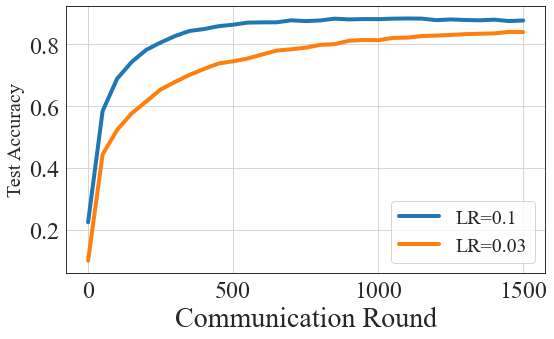

In [136]:
lr1e_1_data = pd.Series(data=lr_1e_1_accs[:31], index=rounds[:31], name="LR=0.1") 
lr3e_2_data = pd.Series(data=lr_3e_2_accs[:31], index=rounds[:31], name="LR=0.03") 
ax = None
ax = lr1e_1_data.plot.line(ax=ax)
ax = lr3e_2_data.plot.line(ax=ax)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Test Accuracy", fontsize=def_font_size)
plt.tight_layout()
plt.legend(loc="best", prop={'size':def_font_size})
plt.savefig("LR_Grid_Search.pdf")

# Accuracy Trajectory

In [137]:
fedavg_largest = wandb.Api().run("flofa/cifar10-cleaned/1956egfp")
fedavg_smallest = wandb.Api().run("flofa/cifar10-cleaned/1dl2fxi9")
superfed_cifar10 = wandb.Api().run("flofa/cifar10-cleaned/3vn2tjv1")

In [138]:
rounds = []
fedavg_largest_accs = []
fedavg_smallest_accs = []
superfed_largest_accs = []
superfed_smallest_accs = []

for i, row in fedavg_largest.history(samples=1500).iterrows():
    fedavg_largest_accs.append(row["Train/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])

for i, row in fedavg_smallest.history(samples=1500).iterrows():
    fedavg_smallest_accs.append(row["Train/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])
    
for i, row in superfed_cifar10.history(samples=1500).iterrows():
    rounds.append(row["round"])
    superfed_smallest_accs.append(row["Train/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])
    superfed_largest_accs.append(row["Train/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
print(rounds[:31])
print(fedavg_smallest_accs)
print(fedavg_largest_accs)
print(superfed_smallest_accs)
print(superfed_largest_accs)

[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1500.0]
[0.1619649805447471, 0.5680731193255513, 0.7028615434500648, 0.7700632295719845, 0.8219033722438391, 0.8598613813229572, 0.8964413099870299, 0.9185716601815823, 0.9352099546044098, 0.9491731517509727, 0.9548678664072633, 0.9627107652399481, 0.9682636186770428, 0.9728639753566797, 0.9767752918287937, 0.9794301232166018, 0.9821862840466926, 0.9839088845654993, 0.9862191958495461, 0.9875567444876784, 0.9873743514915694, 0.9895225356679637, 0.9909208819714657, 0.9907587548638133, 0.9923394941634242, 0.9923394941634242, 0.9922786964980544, 0.9937581063553826, 0.9946903372243839, 0.9946295395590142, 0.9953793774319066, 0.9952983138780804, 0.9952983138780804, 0.9961900129701686]
[0.21031939040207523, 0.6128809987029832, 0.7442242217898832, 0.8253485732814526, 0.883775129

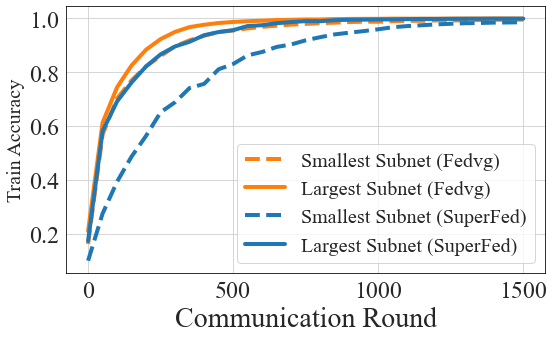

In [139]:
fedavg_smallest_data = pd.Series(data=fedavg_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (Fedvg)") 
fedavg_largest_data = pd.Series(data=fedavg_largest_accs[:31], index=rounds[:31], name="Largest Subnet (Fedvg)") 
superfed_smallest_data = pd.Series(data=superfed_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (SuperFed)") 
superfed_largest_data = pd.Series(data=superfed_largest_accs[:31], index=rounds[:31], name="Largest Subnet (SuperFed)") 
ax = None
fedavg_col = u'#ff7f0e'
superfed_col = u'#1f77b4'
ax = fedavg_smallest_data.plot.line(style=['--'], ax=ax, color=fedavg_col)
ax = fedavg_largest_data.plot.line(ax=ax, color=fedavg_col)
ax = superfed_smallest_data.plot.line(style=['--'], ax=ax, color=superfed_col)
ax = superfed_largest_data.plot.line(ax=ax, color=superfed_col)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Train Accuracy", fontsize=def_font_size)
plt.tight_layout()
plt.legend(loc="best", prop={'size':def_font_size})
plt.savefig("Acc_Over_Time_Graph.pdf")

In [153]:
fedavg_largest1 = wandb.Api().run("flofa/cifar10-cleaned/1956egfp")
fedavg_largest2 = wandb.Api().run("flofa/cifar10-cleaned/3bafwyp3")
fedavg_largest3 = wandb.Api().run("flofa/cifar10-cleaned/ftc7rokb")

fedavg_smallest1 = wandb.Api().run("flofa/cifar10-cleaned/1dl2fxi9")
fedavg_smallest2 = wandb.Api().run("flofa/cifar10-cleaned/1wh978r3")
fedavg_smallest3 = wandb.Api().run("flofa/cifar10-cleaned/nt133vae")

superfed_cifar10 = wandb.Api().run("flofa/cifar10-cleaned/3vn2tjv1")

random1 = wandb.Api().run("flofa/cifar10-cleaned/wvbq5byq")
random2 = wandb.Api().run("flofa/cifar10-cleaned/2odkw0kg")
random3 = wandb.Api().run("flofa/cifar10-cleaned/mpmp3lxm")

psfl1 = wandb.Api().run("flofa/cifar10-cleaned/1wf8vnmm")
psfl2 = wandb.Api().run("flofa/cifar10-cleaned/2eaneuol")
psfl3 = wandb.Api().run("flofa/cifar10-cleaned/1urn02s2")

In [154]:
rounds = []
fedavg_largest_accs = np.array([])
fedavg_smallest_accs = []
random_largest_accs = []
random_smallest_accs = []
psfl_largest_accs = []
psfl_smallest_accs = []
for j, fedLargest in enumerate([fedavg_largest1, fedavg_largest2, fedavg_largest3]):
    fedavg_largest_accs.append(np.array([]))
    for i, row in fedavg_largest1.history(samples=1500).iterrows():
        if j == 0:
            rounds.append(row["round"])
        fedavg_largest_accs[j].append(row["Train/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])
'''
for i, row in fedavg_smallest.history(samples=1500).iterrows():
    fedavg_smallest_accs.append(row["Train/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])
    
for i, row in superfed_cifar10.history(samples=1500).iterrows():
    rounds.append(row["round"])
    superfed_smallest_accs.append(row["Train/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"])
    superfed_largest_accs.append(row["Train/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"])'''
print(rounds[:31])
#print(fedavg_smallest_accs)
print(fedavg_largest_accs)
#print(superfed_smallest_accs)
#print(superfed_largest_accs)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
fedavg_smallest_data_avg = pd.Series(data=fedavg_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (Fedvg)") 


In [155]:
fedavg_smallest_data = pd.Series(data=fedavg_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (Fedvg)") 
fedavg_largest_data = pd.Series(data=fedavg_largest_accs[:31], index=rounds[:31], name="Largest Subnet (Fedvg)") 
superfed_smallest_data = pd.Series(data=superfed_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (SuperFed)") 
superfed_largest_data = pd.Series(data=superfed_largest_accs[:31], index=rounds[:31], name="Largest Subnet (SuperFed)") 
ax = None
fedavg_col = u'#ff7f0e'
superfed_col = u'#1f77b4'
ax = fedavg_smallest_data.plot.line(style=['--'], ax=ax, color=fedavg_col)
ax = fedavg_largest_data.plot.line(ax=ax, color=fedavg_col)
ax = superfed_smallest_data.plot.line(style=['--'], ax=ax, color=superfed_col)
ax = superfed_largest_data.plot.line(ax=ax, color=superfed_col)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Train Accuracy", fontsize=def_font_size)
plt.tight_layout()
plt.legend(loc="best", prop={'size':def_font_size})
plt.savefig("Acc_Over_Time_Graph.pdf")

/var/folders/1g/k9xfmv_s29vf0f5bf06smtn00000gn/T/ipykernel_86072/3967718749.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fedavg_smallest_data = pd.Series(data=fedavg_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (Fedvg)")


ValueError: Length of values (31) does not match length of index (0)

# Acc Over Time PS+FL, Random, FedAvg

In [176]:
rounds = []
fedavg_largest_accs = []
fedavg_smallest_accs = []
superfed_largest_accs = []
superfed_smallest_accs = []
random_largest_accs = []
random_smallest_accs = []
psfl_largest_accs = []
psfl_smallest_accs = []
multiplier = 100

for i, row in fedavg_largest1.history(samples=1500).iterrows():
    fedavg_largest_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]*multiplier)

for i, row in fedavg_smallest1.history(samples=1500).iterrows():
    fedavg_smallest_accs.append(row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"]*multiplier)
    
for i, row in superfed_cifar10.history(samples=1500).iterrows():
    rounds.append(row["round"])
    superfed_smallest_accs.append(row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"]*multiplier)
    superfed_largest_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]*multiplier)
    
for i, row in random1.history(samples=1500).iterrows():
    random_smallest_accs.append(row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"]*multiplier)
    random_largest_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]*multiplier)
    
for i, row in psfl1.history(samples=1500).iterrows():
    if row["round"] % 50 == 0:
        psfl_smallest_accs.append(row["Test/{'d': [0, 0, 0, 0], 'e': 0.1}/Acc"]*multiplier)
        psfl_largest_accs.append(row["Test/{'d': [2, 2, 2, 2], 'e': 0.25}/Acc"]*multiplier)
    
print(rounds[:31])
print(fedavg_smallest_accs)
print(fedavg_largest_accs)
print(superfed_smallest_accs)
print(superfed_largest_accs)
print(random_largest_accs)
print(len(random_smallest_accs))
print(len(psfl_smallest_accs))

[0.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0, 1050.0, 1100.0, 1150.0, 1200.0, 1250.0, 1300.0, 1350.0, 1400.0, 1450.0, 1500.0]
[15.665064102564102, 60.837339743589745, 73.53766025641025, 78.83613782051282, 81.23998397435898, 82.74238782051282, 83.64383012820514, 84.34495192307693, 84.21474358974359, 84.4150641025641, 84.58533653846155, 84.53525641025641, 84.53525641025641, 84.61538461538461, 84.81570512820514, 85.10616987179486, 84.8858173076923, 84.83573717948718, 85.06610576923077, 84.73557692307693, 85.02604166666666, 85.05608974358975, 85.04607371794873, 84.89583333333334, 85.15625, 85.04607371794873, 84.83573717948718, 85.01602564102564, 84.77564102564102, 84.79567307692307, 84.98597756410257, 84.99599358974359, 85.02604166666666, 85.01602564102564]
[21.764823717948715, 64.27283653846155, 77.0332532051282, 83.29326923076923, 86.52844551282051, 88.21113782051282, 88.74198717948718, 88

In [180]:
fedavg_smallest_data = pd.Series(data=fedavg_smallest_accs[:31], index=rounds[:31], name="Smallest Subnet (FedAvg)") 
fedavg_largest_data = pd.Series(data=fedavg_largest_accs[:31], index=rounds[:31], name="Largest Subnet (FedAvg)") 
superfed_smallest_data = pd.Series(data=superfed_smallest_accs[:31], index=rounds[:31], name="SuperFed (Single Stage)") 
superfed_largest_data = pd.Series(data=superfed_largest_accs[:31], index=rounds[:31], name="SuperFed (Single Stage)") 
random_smallest_data = pd.Series(data=random_smallest_accs[:31], index=rounds[:31], name="Single Stage") 
random_largest_data = pd.Series(data=random_largest_accs[:31], index=rounds[:31], name="Single Stage") 
psfl_smallest_data = pd.Series(data=psfl_smallest_accs[:31], index=rounds[:31], name="Multi-Stage") 
psfl_largest_data = pd.Series(data=psfl_largest_accs[:31], index=rounds[:31], name="Multi-Stage") 

In [181]:
psfl_smallest_data

0.0       11.41
50.0      25.15
100.0     27.72
150.0     24.43
200.0     21.20
250.0     21.66
300.0     18.80
350.0     20.01
400.0     17.70
450.0     18.26
500.0     18.85
550.0     16.55
600.0     19.49
650.0     20.16
700.0     18.84
750.0     24.26
800.0     65.73
850.0     72.33
900.0     74.96
950.0     74.95
1000.0    77.58
1050.0    80.47
1100.0    82.55
1150.0    81.30
1200.0    80.06
1250.0    79.88
1300.0    82.24
1350.0    82.36
1400.0    82.82
1450.0    82.98
1500.0    84.01
Name: Multi-Stage, dtype: float64

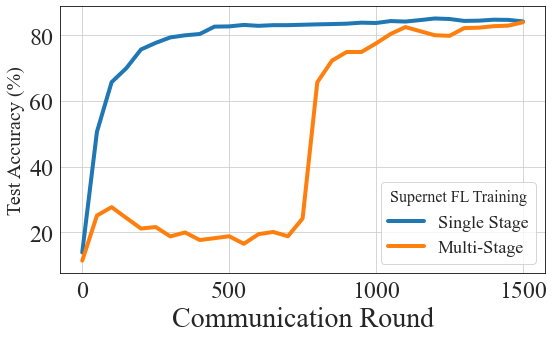

In [191]:
ax = None
#ax = fedavg_smallest_data.plot.line(ax=ax)
ax = random_smallest_data.plot.line(ax=ax)
ax = psfl_smallest_data.plot.line(ax=ax)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Test Accuracy (%)", fontsize=def_font_size)
plt.tight_layout()
plt.legend(title="Supernet FL Training", loc="best", prop={'size':def_font_size-2})
plt.savefig("SmallestNetFedRandomPSFLAccOverTime.pdf")

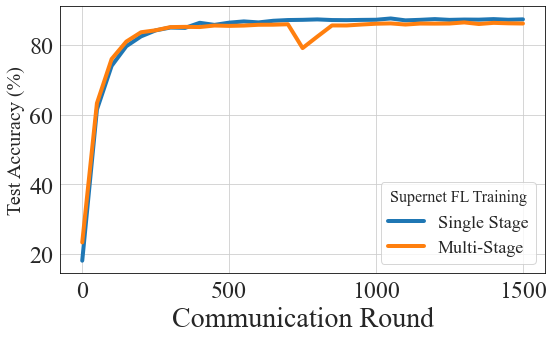

In [192]:
ax = None
#ax = fedavg_largest_data.plot.line(ax=ax)
ax = random_largest_data.plot.line(ax=ax)
ax = psfl_largest_data.plot.line(ax=ax)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Test Accuracy (%)", fontsize=def_font_size)
plt.tight_layout()
plt.legend(title="Supernet FL Training", loc="best", prop={'size':def_font_size-2})
plt.savefig("LargestNetFedRandomPSFLAccOverTime.pdf")

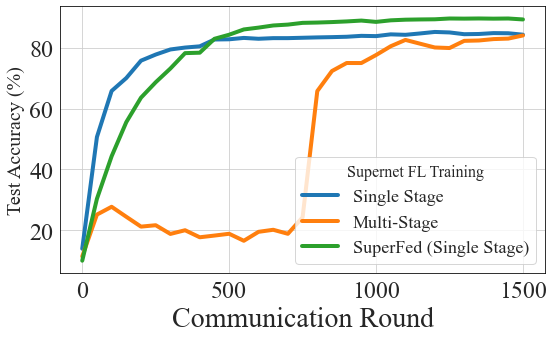

In [193]:
ax = None
#ax = fedavg_smallest_data.plot.line(ax=ax)
ax = random_smallest_data.plot.line(ax=ax)
ax = psfl_smallest_data.plot.line(ax=ax)
ax = superfed_smallest_data.plot.line(ax=ax)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Test Accuracy (%)", fontsize=def_font_size)
plt.tight_layout()
plt.legend(title="Supernet FL Training", loc="best", prop={'size':def_font_size-2})
plt.savefig("SmallestNetAccOverTime.pdf")

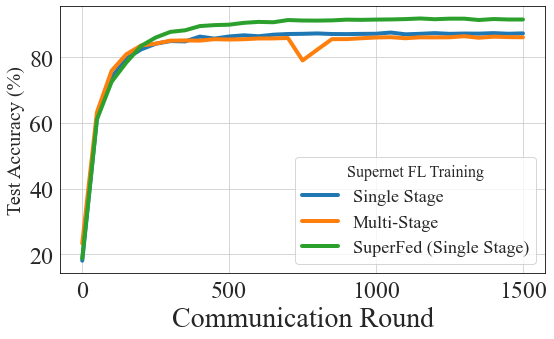

In [194]:
ax = None
#ax = fedavg_largest_data.plot.line(ax=ax)
ax = random_largest_data.plot.line(ax=ax)
ax = psfl_largest_data.plot.line(ax=ax)
ax = superfed_largest_data.plot.line(ax=ax)

for spine in ax.spines.values():
    spine.set_edgecolor('black')
plt.xlabel("Communication Round")
#plt.xlim(xlim_1,xlim_2) # have uniform x-axis accross all plots
#plt.ylim(0,1) # have uniform y-axis accross all plots
plt.ylabel("Test Accuracy (%)", fontsize=def_font_size)
plt.tight_layout()
plt.legend(title="Supernet FL Training", loc="best", prop={'size':def_font_size-2})
plt.savefig("LargestNetAccOverTime.pdf")

# Client Class Distribution

In [212]:
alpha100_dists = {0: {0: 241, 1: 221, 2: 233, 3: 205, 4: 187, 5: 276, 6: 261, 7: 255, 8: 288, 9: 219}, 1: {0: 286, 1: 260, 2: 220, 3: 214, 4: 262, 5: 219, 6: 226, 7: 285, 8: 234, 9: 269}, 2: {0: 238, 1: 274, 2: 285, 3: 228, 4: 262, 5: 238, 6: 202, 7: 295, 8: 219, 9: 262}, 3: {0: 225, 1: 245, 2: 295, 3: 218, 4: 229, 5: 224, 6: 232, 7: 256, 8: 276, 9: 222}, 4: {0: 212, 1: 226, 2: 273, 3: 270, 4: 279, 5: 249, 6: 246, 7: 229, 8: 244, 9: 265}, 5: {0: 253, 1: 239, 2: 216, 3: 266, 4: 225, 5: 252, 6: 272, 7: 247, 8: 233, 9: 243}, 6: {0: 233, 1: 241, 2: 223, 3: 245, 4: 249, 5: 224, 6: 238, 7: 250, 8: 262, 9: 214}, 7: {0: 263, 1: 275, 2: 224, 3: 285, 4: 259, 5: 237, 6: 237, 7: 213, 8: 287, 9: 251}, 8: {0: 218, 1: 240, 2: 230, 3: 264, 4: 263, 5: 249, 6: 266, 7: 267, 8: 228, 9: 257}, 9: {0: 242, 1: 273, 2: 233, 3: 245, 4: 236, 5: 286, 6: 234, 7: 226, 8: 228, 9: 274}, 10: {0: 254, 1: 265, 2: 240, 3: 228, 4: 261, 5: 252, 6: 270, 7: 260, 8: 257, 9: 242}, 11: {0: 280, 1: 259, 2: 259, 3: 240, 4: 250, 5: 314, 6: 251, 7: 297, 8: 262, 9: 268}, 12: {0: 260, 1: 256, 2: 229, 3: 277, 4: 291, 5: 241, 6: 308, 7: 254, 8: 275, 9: 261}, 13: {0: 271, 1: 248, 2: 235, 3: 267, 4: 240, 5: 217, 6: 249, 7: 245, 8: 244, 9: 237}, 14: {0: 288, 1: 248, 2: 295, 3: 271, 4: 233, 5: 231, 6: 245, 7: 276, 8: 213, 9: 248}, 15: {0: 276, 1: 254, 2: 295, 3: 271, 4: 262, 5: 232, 6: 272, 7: 209, 8: 254, 9: 242}, 16: {0: 230, 1: 235, 2: 250, 3: 241, 4: 221, 5: 298, 6: 245, 7: 229, 8: 223, 9: 269}, 17: {0: 279, 1: 229, 2: 301, 3: 261, 4: 249, 5: 264, 6: 252, 7: 229, 8: 255, 9: 259}, 18: {0: 230, 1: 281, 2: 197, 3: 236, 4: 291, 5: 269, 6: 244, 7: 216, 8: 288, 9: 238}, 19: {0: 221, 1: 231, 2: 267, 3: 268, 4: 251, 5: 228, 6: 250, 7: 262, 8: 230, 9: 260}}

In [213]:
alpha1_dists = {0: {0: 338, 1: 437, 2: 234, 3: 442, 4: 76, 5: 521, 6: 247, 7: 273}, 1: {0: 146, 1: 233, 2: 194, 3: 192, 4: 37, 5: 28, 6: 781, 7: 462, 8: 16, 9: 496}, 2: {0: 582, 1: 98, 2: 134, 3: 32, 4: 28, 5: 363, 6: 278, 7: 23, 8: 246, 9: 3}, 3: {0: 7, 1: 286, 2: 169, 3: 351, 4: 734, 5: 11, 6: 151, 7: 62, 8: 630, 9: 1040}, 4: {0: 28, 1: 1138, 2: 431, 3: 671, 4: 87, 5: 631}, 5: {0: 109, 2: 519, 3: 329, 4: 33, 5: 65, 6: 49, 7: 46, 8: 1023, 9: 136}, 6: {0: 20, 1: 352, 2: 36, 3: 159, 4: 4, 5: 254, 6: 498, 7: 29, 8: 15, 9: 639}, 7: {0: 22, 1: 79, 2: 137, 3: 266, 4: 73, 5: 34, 6: 82, 7: 177, 8: 111, 9: 16}, 8: {0: 192, 1: 275, 2: 318, 3: 276, 4: 398, 5: 223, 6: 103, 7: 8, 8: 384, 9: 389}, 9: {0: 56, 1: 54, 2: 5, 3: 381, 4: 147, 5: 61, 6: 14, 7: 449, 8: 357, 9: 113}, 10: {0: 227, 1: 45, 2: 261, 3: 172, 4: 862, 5: 462, 6: 159, 7: 1571}, 11: {0: 610, 1: 332, 2: 70, 3: 5, 4: 204, 5: 103, 6: 462, 7: 271, 8: 1006}, 12: {0: 400, 1: 292, 2: 206, 3: 429, 4: 447, 5: 95, 6: 66, 7: 138, 8: 91, 9: 1206}, 13: {0: 66, 1: 334, 2: 446, 3: 7, 4: 653, 5: 134, 6: 121, 7: 84, 8: 47, 9: 391}, 14: {0: 22, 1: 283, 2: 378, 3: 148, 4: 4, 5: 71, 6: 384, 7: 83, 8: 971, 9: 9}, 15: {0: 690, 1: 20, 2: 276, 3: 627, 4: 66, 5: 254, 6: 1452}, 16: {0: 1198, 1: 429, 2: 28, 3: 120, 4: 371, 5: 587}, 17: {0: 108, 1: 95, 2: 48, 3: 224, 4: 671, 5: 374, 6: 30, 7: 1111}, 18: {0: 142, 1: 50, 2: 154, 3: 63, 4: 13, 5: 430, 6: 61, 7: 67, 8: 87, 9: 144}, 19: {0: 37, 1: 168, 2: 956, 3: 106, 4: 92, 5: 299, 6: 62, 7: 146, 8: 16, 9: 418}}

In [214]:
alpha1e_1_dists = {0: {0: 628, 1: 447, 4: 3, 6: 10, 7: 1, 8: 102, 9: 425}, 1: {4: 9, 5: 1246, 6: 99, 7: 199, 8: 8, 9: 32}, 2: {1: 7, 2: 70, 5: 210, 6: 1, 9: 1377}, 3: {0: 29, 1: 777, 5: 783, 6: 288, 7: 73, 8: 1626}, 4: {0: 80, 1: 20, 4: 17, 5: 95, 6: 2447}, 5: {0: 1237, 2: 281, 3: 82, 4: 660, 8: 186}, 6: {1: 243, 4: 1, 5: 1, 8: 1, 9: 1992}, 7: {0: 4, 3: 228, 4: 319, 5: 1252, 6: 2129}, 8: {0: 280, 4: 1645, 5: 22, 7: 4508}, 9: {0: 957, 1: 9, 2: 103, 4: 1852}, 10: {2: 2388, 3: 105, 5: 24}, 11: {0: 1026, 1: 1016, 2: 43, 5: 667}, 12: {0: 88, 4: 28, 5: 8, 7: 165, 9: 1}, 13: {0: 56, 1: 69, 2: 15, 3: 1484, 6: 2, 8: 4, 9: 5}, 14: {0: 73, 2: 38, 3: 41, 4: 1, 5: 3, 7: 9, 9: 1167}, 15: {0: 536, 1: 1481, 2: 10, 3: 1280}, 16: {0: 5, 2: 218, 3: 1362, 7: 24, 8: 681}, 17: {2: 1797, 3: 107, 4: 458, 5: 686}, 18: {1: 83, 2: 22, 3: 104, 5: 2, 6: 23, 7: 20, 8: 2388}, 19: {0: 1, 1: 848, 2: 15, 3: 207, 4: 7, 5: 1, 6: 1, 7: 1, 8: 4, 9: 1}}

## Alpha 100 Client Class Distribution

In [133]:
def generateScatterXY(cli_class_dist):
    x = [i for i in range(20)]
    classes = []
    for i in range (10):
        cur_class = []
        for client_id in x:
            if i not in cli_class_dist[client_id].keys():
                cur_class.append(0)
            else:
                cur_class.append(cli_class_dist[client_id][i])
        classes.append(cur_class)
    return x, classes
xy_label_fontsize=96
x_tick_fontsize=75
x_tick_rotation=0
y_tick_fontsize=96

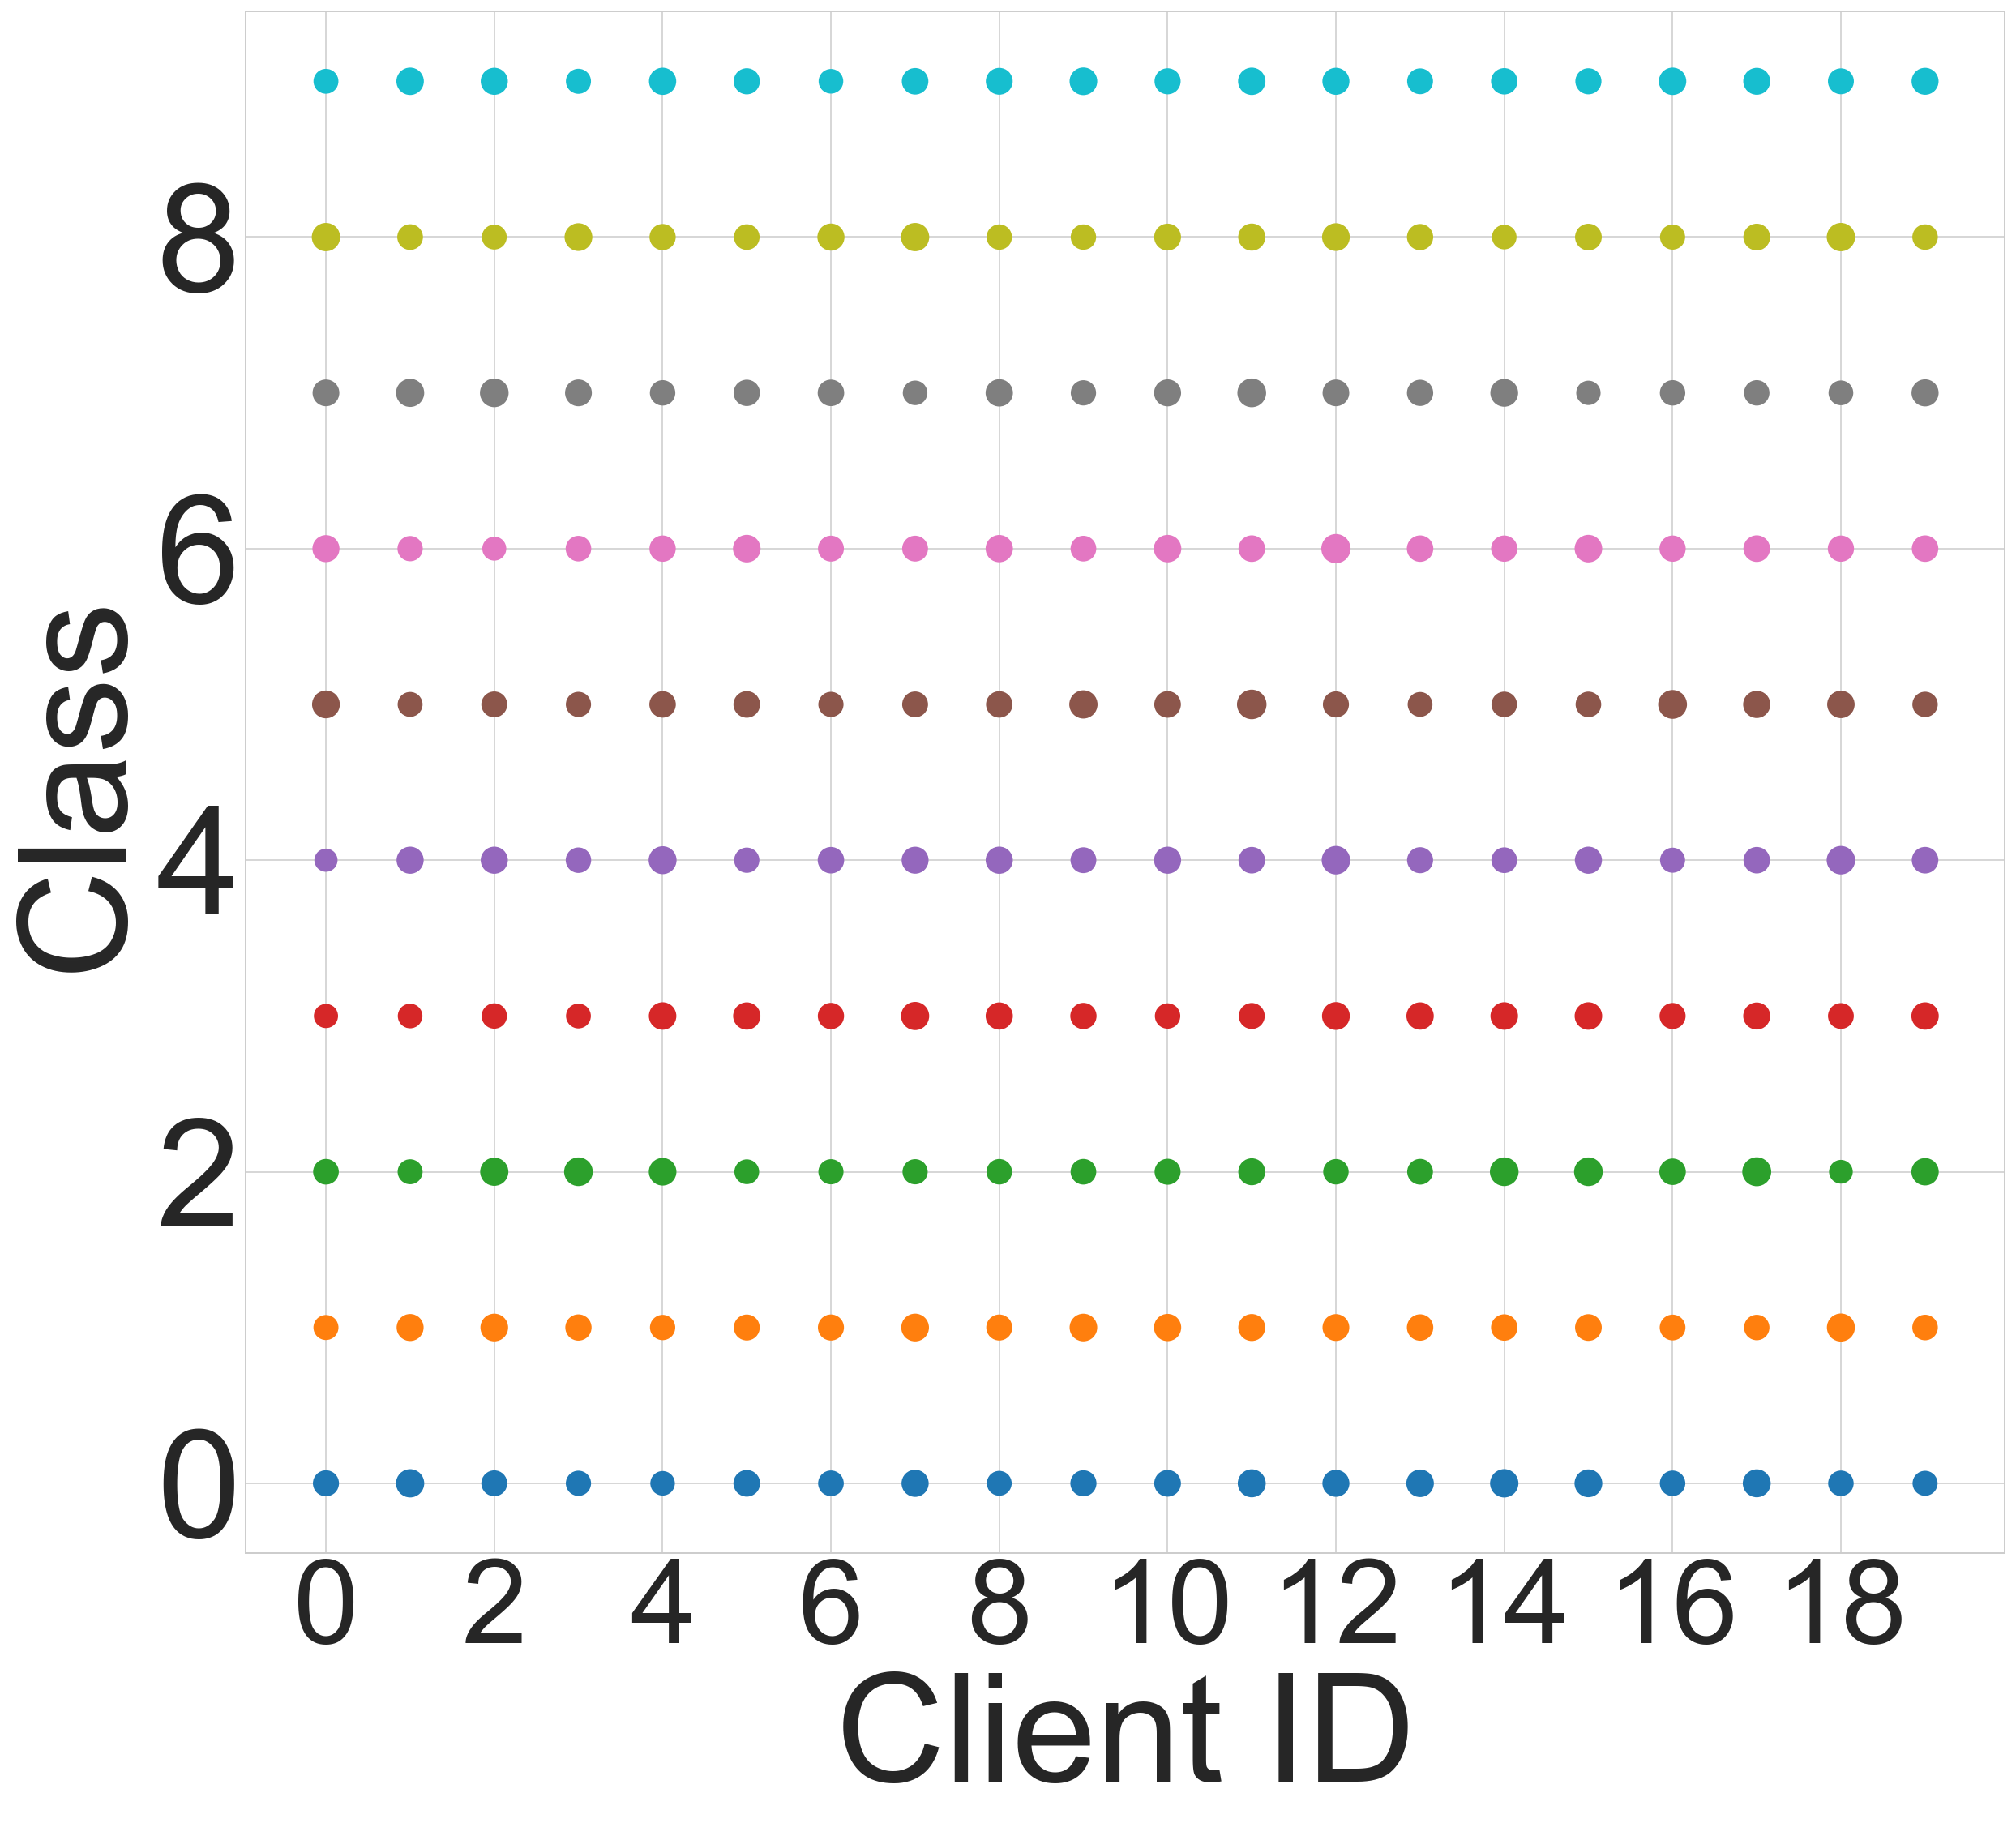

In [134]:
x, y = generateScatterXY(alpha100_dists)
from matplotlib.pyplot import figure
figure(figsize=(20, 18), dpi=140)
for i in range (10):
    plt.scatter(x,[i for j in range(20)], s=y[i])
plt.xticks(np.arange(0, 20, 2))
plt.xticks(fontsize=x_tick_fontsize, rotation=x_tick_rotation)
plt.yticks(fontsize=y_tick_fontsize)
plt.ylabel("Class", fontsize=xy_label_fontsize)
plt.xlabel("Client ID", fontsize=xy_label_fontsize)
plt.savefig("Alpha100_Client_Class_Distribution.pdf")

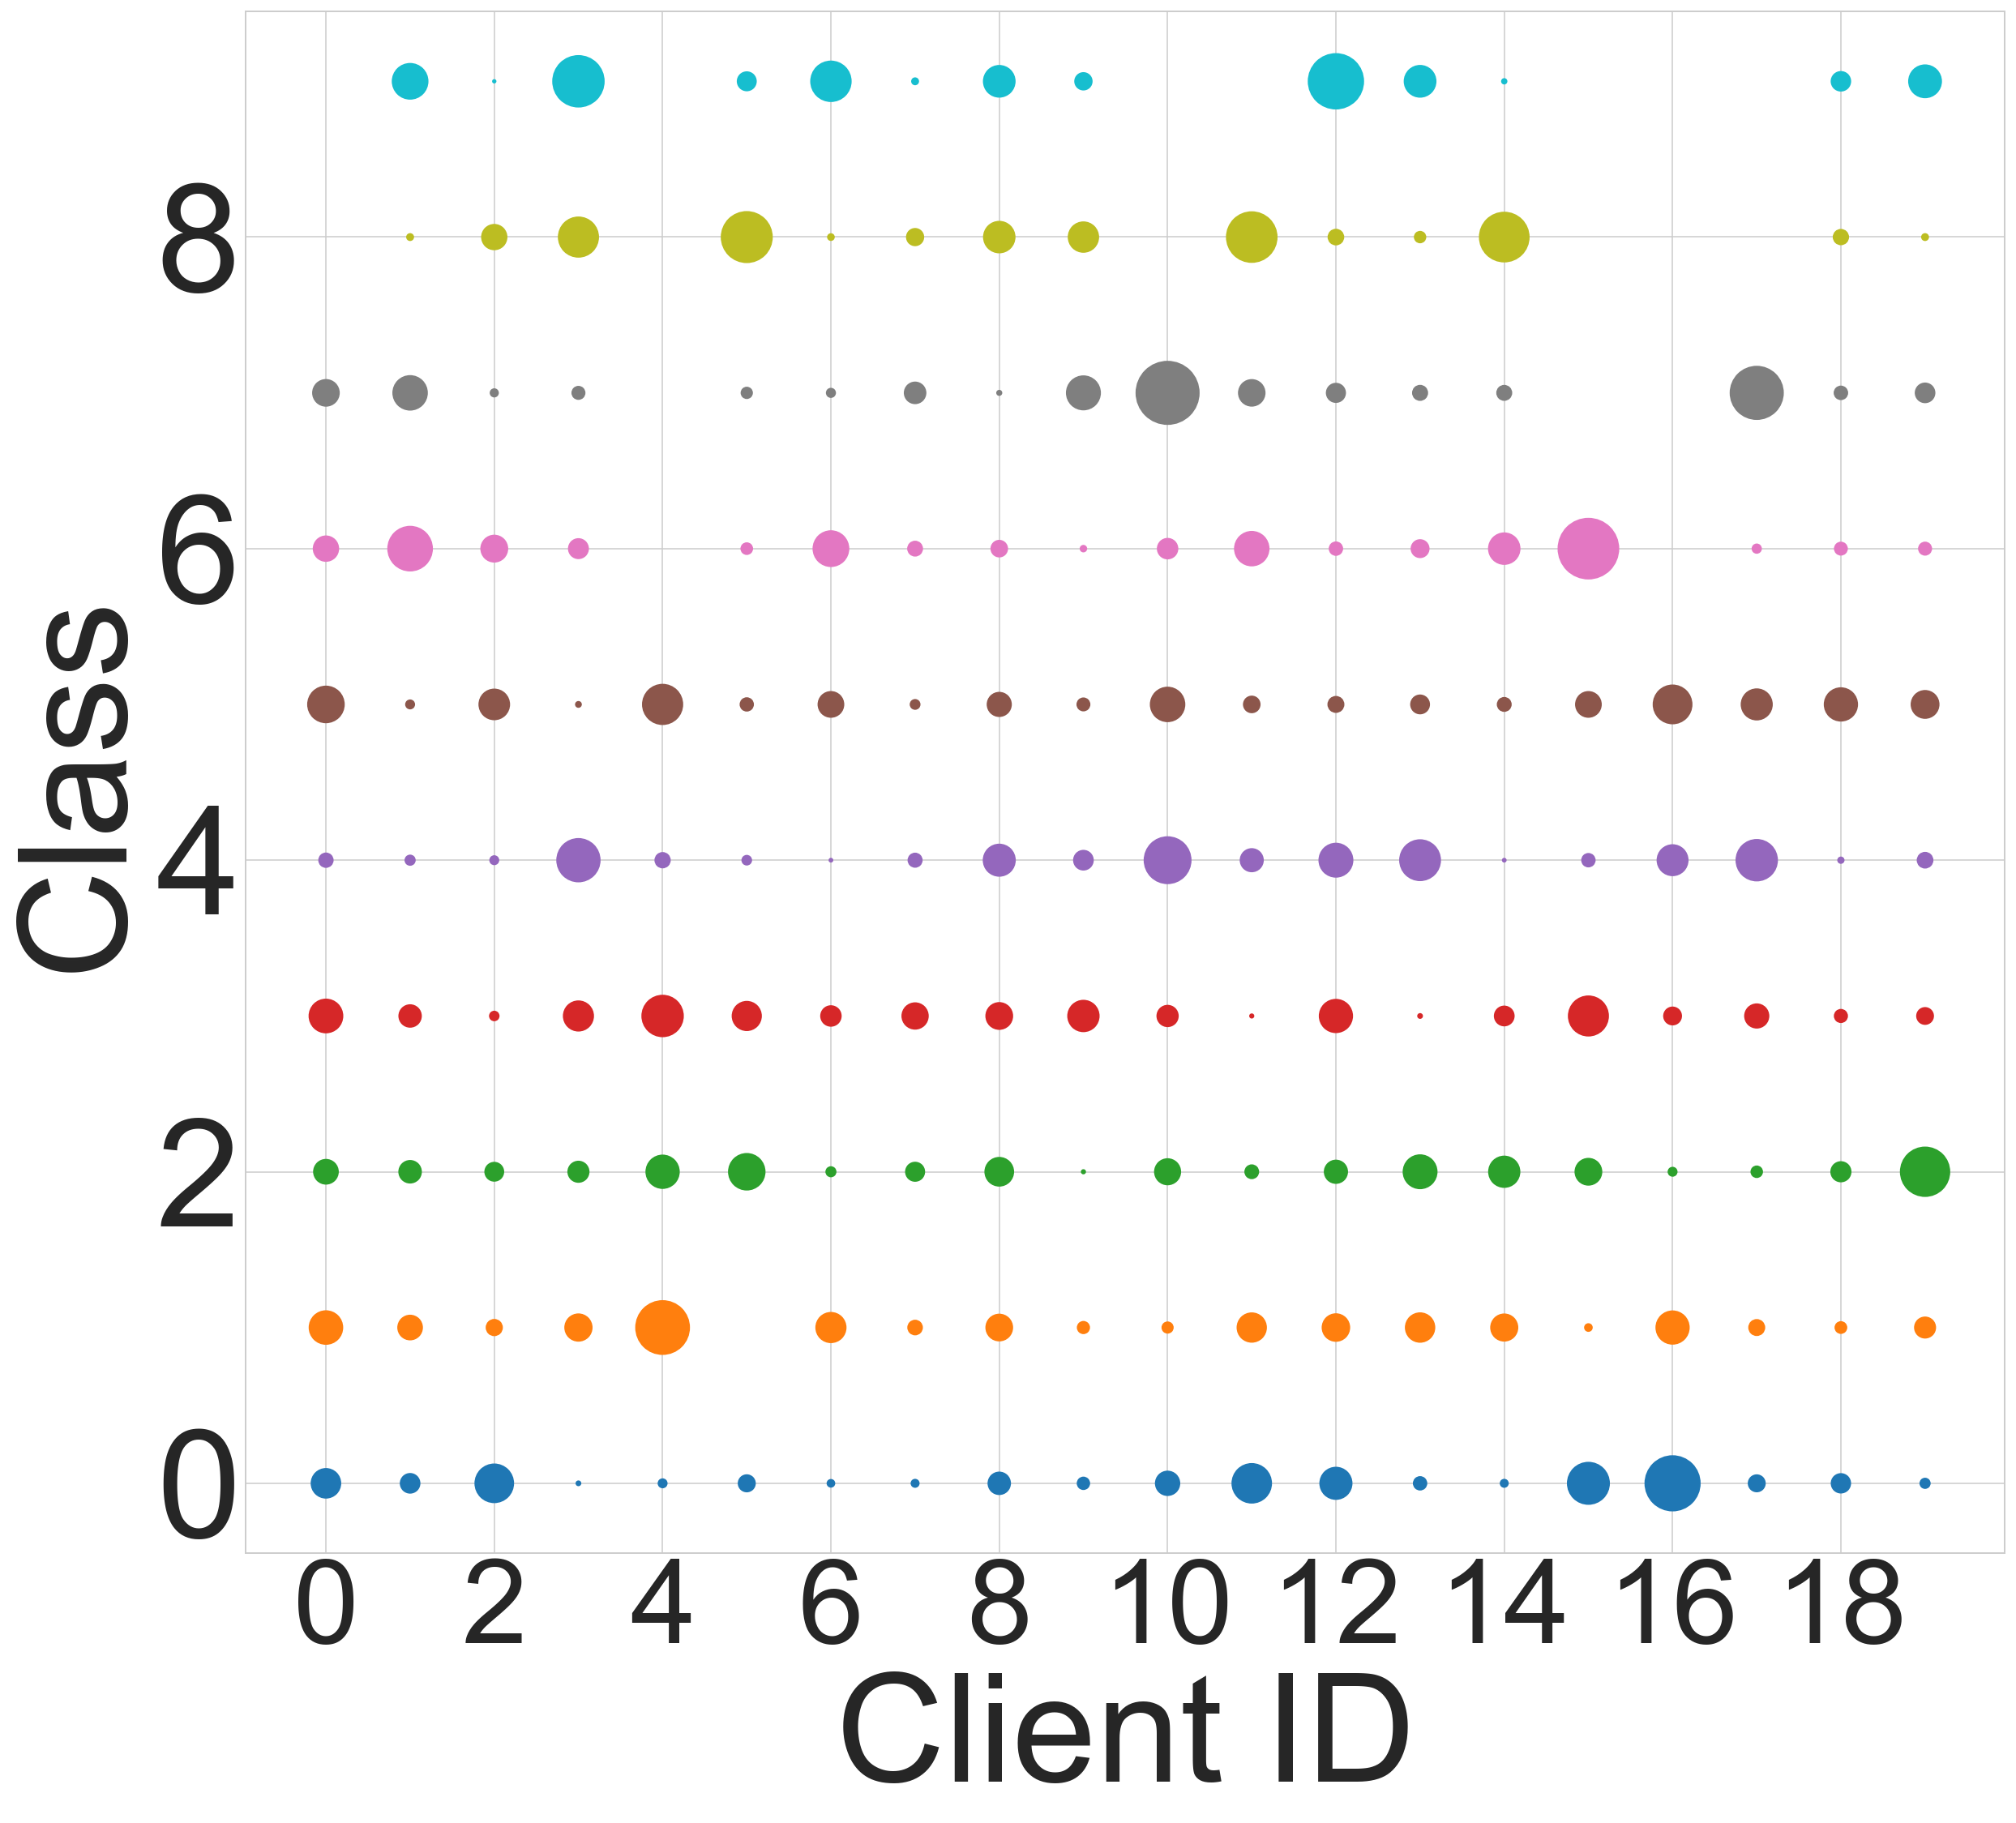

In [135]:
x, y = generateScatterXY(alpha1_dists)
from matplotlib.pyplot import figure
figure(figsize=(20, 18), dpi=140)
for i in range (10):
    plt.scatter(x,[i for j in range(20)], s=y[i])
plt.xticks(np.arange(0, 20, 2))
plt.xticks(fontsize=x_tick_fontsize, rotation=x_tick_rotation)
plt.yticks(fontsize=y_tick_fontsize)
plt.ylabel("Class", fontsize=xy_label_fontsize)
plt.xlabel("Client ID", fontsize=xy_label_fontsize)
plt.savefig("Alpha1_Client_Class_Distribution.pdf")

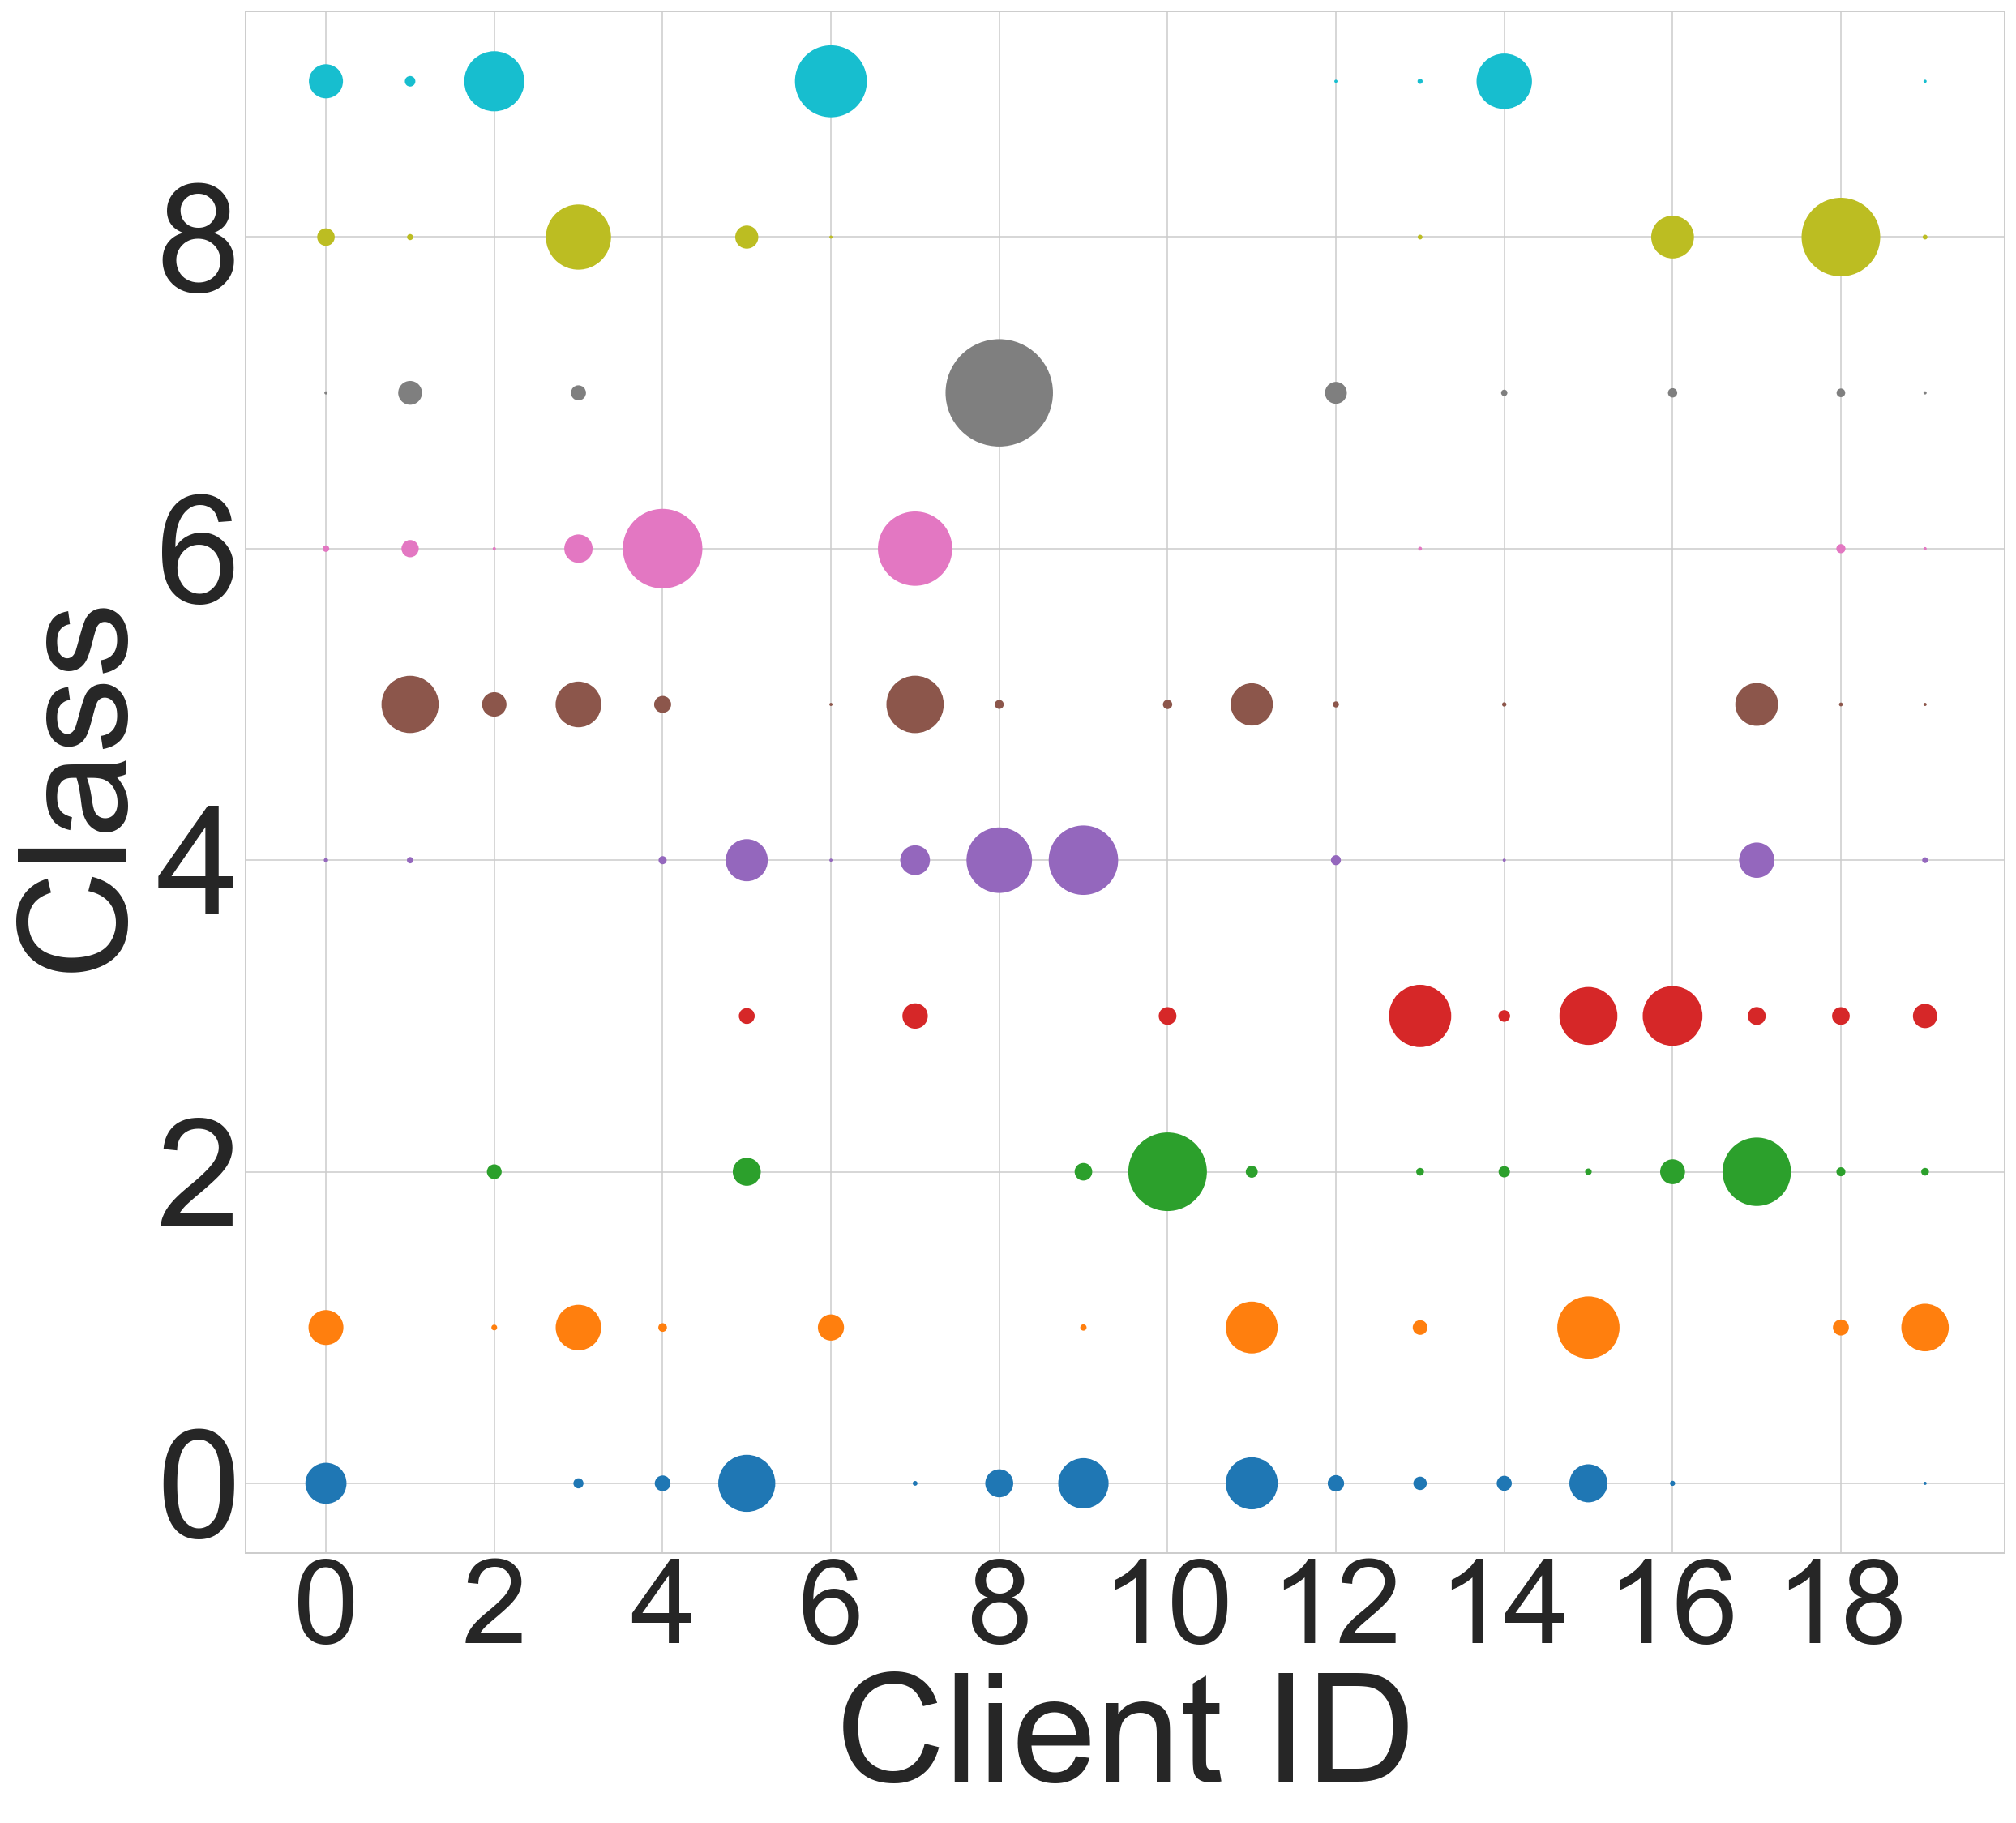

In [136]:
x, y = generateScatterXY(alpha1e_1_dists)
from matplotlib.pyplot import figure
figure(figsize=(20, 18), dpi=140)
for i in range (10):
    plt.scatter(x,[i for j in range(20)], s=y[i])
plt.xticks(np.arange(0, 20, 2))
plt.xticks(fontsize=x_tick_fontsize, rotation=x_tick_rotation)
plt.yticks(fontsize=y_tick_fontsize)
plt.ylabel("Class", fontsize=xy_label_fontsize)
plt.xlabel("Client ID", fontsize=xy_label_fontsize)
plt.savefig("Alpha0_1_Client_Class_Distribution.pdf")